# To Grant or Not to Grant: Deciding on Compensation Benefits 

### Machine Learning Group Project 2024/2025 - Group 52


__Members:__
- Diogo Rodrigues _(20240512@novaims.unl.pt)_
- Alexandre Gonçalves _(20240738@novaims.unl.pt)_
- Pedro Costa _(20222121@novaims.unl.pt)_
- Santiago Taylor _(20240542@novaims.unl.pt)_
- Lena Hermann _(20241446@novaims.unl.pt)_

## Introduction
- __Motivation__: The New York Workers’ Compensation Board (WCB) handles a vast number of workplace injury claims, which require timely and accurate decisions. Currently, manually reviewing these claims is both resource-intensive and time-consuming. An automated model could significantly expedite the decision-making process, improving efficiency and consistency in awarding compensation.
- __Dataset__: The dataset contains claims assembled by the WCB from the beginning of 2020 to the end of 2022, which serves as the training data. The test data comprises claims from January 2023 onward. Each claim includes various attributes such as injury details, claimant information, and associated codes that characterize the nature, cause, and affected body part of the injury. This comprehensive dataset enables the development of predictive models based on historical decisions.
- __Task and Goal__: The primary objective of this project is to develop and evaluate machine learning models that can accurately classify the WCB’s final decision on the type of injury for each claim (i.e., the "Claim Injury Type"). This involves creating a multiclass classification model to predict injury types based on the provided features, optimizing model performance, and assessing the importance of different features. The ultimate goal is to produce a model that can generalize well to unseen data, assisting the WCB in making faster, data-driven decisions on new claims.

| **ATTRIBUTE**                        | **DESCRIPTION**                                                                                                         |
|--------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| Accident Date                        | Injury date of the claim.                                                                                               |
| Age at Injury                        | Age of injured worker when the injury occurred.                                                                         |
| Alternative Dispute Resolution       | Adjudication processes external to the Board.                                                                           |
| Assembly Date                        | The date the claim was first assembled.                                                                                 |
| Attorney/Representative              | Is the claim being represented by an Attorney?                                                                          |
| Average Weekly Wage                  | The wage used to calculate workers’ compensation, disability, or Paid Leave wage replacement benefits.                  |
| Birth Year                           | The reported year of birth of the injured worker.                                                                       |
| C-2 Date                             | Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).              |
| C-3 Date                             | Date Form C-3 (Employee Claim Form) was received.                                                                       |
| Carrier Name                         | Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker's employer. |
| Carrier Type                         | Type of primary insurance provider responsible for providing workers’ compensation coverage.                            |
| Claim Identifier                     | Unique identifier for each claim, assigned by WCB.                                                                      |
| County of Injury                     | Name of the New York County where the injury occurred.                                                                  |
| COVID-19 Indicator                   | Indication that the claim may be associated with COVID-19.                                                              |
| District Name                        | Name of the WCB district office that oversees claims for that region or area of the state.                              |
| First Hearing Date                   | Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held. |
| Gender                               | The reported gender of the injured worker.                                                                              |
| IME-4 Count                          | Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner’s Report of Independent Medical Examination” form. |
| Industry Code                        | NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.                     |
| Industry Code Description            | 2-digit NAICS industry code description used to classify businesses according to their economic activity.               |
| Medical Fee Region                   | Approximate region where the injured worker would receive medical service.                                               |
| OIICS Nature of Injury Description   | The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.         |
| WCIO Cause of Injury Code            | The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  |
| WCIO Cause of Injury Description     | See description of field above.                                                                                         |
| WCIO Nature of Injury Code           | The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.                     |
| WCIO Nature of Injury Description    | See description of field above.                                                                                         |
| WCIO Part Of Body Code               | The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.      |
| WCIO Part Of Body Description        | See description of field above.                                                                                         |
| Zip Code                             | The reported ZIP code of the injured worker’s home address.                                                             |
| Agreement Reached                    | Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.    |
| WCB Decision                         | Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim. |
| Claim Injury Type                    | Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.   |


## Table of Content
<a id='top'></a>
[1. Set-Up and Data Loading](#dataload) <br>
&nbsp;&nbsp;&nbsp;[1.1 Import the Needed Libraries](#import_libaries) <br>
&nbsp;&nbsp;&nbsp;[1.2 Read the Data and First Overview](#read_data) <br>
[2. Data Understanding and Exploration](#dataunderstand) <br>
&nbsp;&nbsp;&nbsp;[2.1 Target Variable Analysis](#target) <br>
&nbsp;&nbsp;&nbsp;[2.2 Data Anomalies and Inconsistencies](#anomalies) <br>
&nbsp;&nbsp;&nbsp;[2.3 Data Codes to Descriptions Analysis](#data_codes) <br>
[3. Data Cleaning and Pre-processing](#dataclean) <br>
&nbsp;&nbsp;&nbsp;[3.1 Train-Validation Split](#train_val_split) <br>
&nbsp;&nbsp;&nbsp;[3.2 Imputations](#imputations) <br>
&nbsp;&nbsp;&nbsp;[3.3 Outliers Handling](#outliers_handling) <br>
&nbsp;&nbsp;&nbsp;[3.4 Binning and Feature Extraction](#binning) <br>
&nbsp;&nbsp;&nbsp;[3.5 Encoding and Data Scaling](#encoding) <br>
[4. Feature Selection](#features) <br>
&nbsp;&nbsp;&nbsp;[4.1 Correlation](#correlation) <br>
&nbsp;&nbsp;&nbsp;[4.2 RFE](#rfe) <br>
&nbsp;&nbsp;&nbsp;[4.3 RFECV](#rfecv) <br>
&nbsp;&nbsp;&nbsp;[4.4 Lasso Regression](#lasso) <br>
[5. Modeling and Evaluation](#modeling) <br>
&nbsp;&nbsp;&nbsp;[5.1 Baseline](#baseline) <br>
&nbsp;&nbsp;&nbsp;[5.2 Logistic Regression](#logistic_regression) <br>
&nbsp;&nbsp;&nbsp;[5.3 Random Forest](#random_forest) <br>

## 1. Set-Up and Data Loading <a id='dataload'></a>
[to the top](#top)

### 1.1 Import the Needed Libraries <a id='import_libaries'></a>

In [288]:
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile #to open zipfile
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
from scipy.stats import mode

# data partition
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# embedded methods
from sklearn.linear_model import LassoCV

# encoding and scaling
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# models
from sklearn.ensemble import RandomForestClassifier

# model assessment
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the Data and First Overview <a id='read_data'></a>
[to the top](#top)

In [2]:
train_zip_path = 'train_data.csv.zip'
test_zip_path = 'test_data.csv.zip'

# open csv file from zip
def read_zipped_csv(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_filename = z.namelist()[0]
        
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

train_df = read_zipped_csv(train_zip_path)
test_df = read_zipped_csv(test_zip_path)

In [3]:
train_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
test_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


## 2. Data Understanding and Exploration <a id='dataunderstand'></a>
[to the top](#top)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [6]:
# Have a first look at the numerical variables and their distirbutions
train_df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [7]:
# Have a first look at the categorical variables and their distirbutions
train_df.describe(include='O')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [8]:
# before working on the dataset, we will do a copy so we can use the original one if we need it
train_df_temp = train_df.copy()

### 2.1 __Target Variable__ Analysis <a id='target'></a>
[to the top](#top)

We just have a look at the distribution of the target variable 'Claim Injury Type'. To check how our dataset is balanced.

In [9]:
train_df_temp['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

In [10]:
non_comp_percent = round(train_df_temp['Claim Injury Type'].value_counts().max() / len(train_df_temp),4)

print('Percentage of Non-Comp Cases: {}%'.format(non_comp_percent*100))

Percentage of Non-Comp Cases: 49.05%


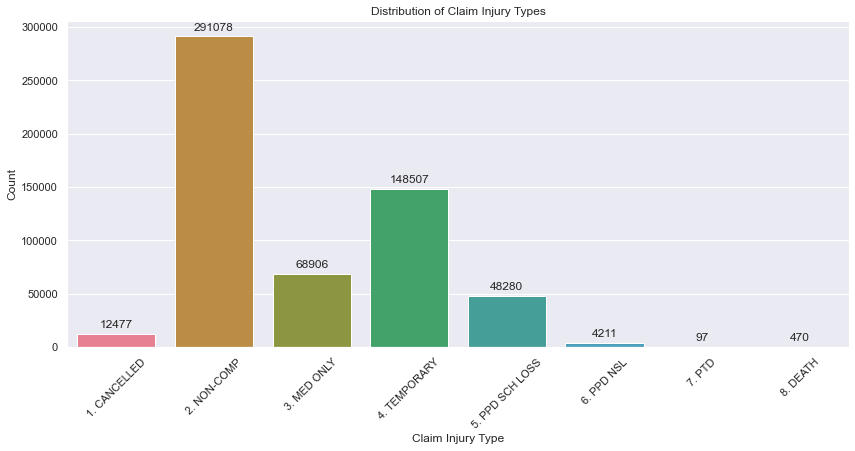

In [11]:
# Define the custom order for 'Claim Injury Type'
custom_order = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY',
                '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

# Plot distribution of target values with the custom order
target_values = train_df_temp['Claim Injury Type'].value_counts()

# Convert target values to a DataFrame and reorder based on custom order
df_target_counts = target_values.reset_index()
df_target_counts.columns = ['Claim Injury Type', 'Count']
df_target_counts = df_target_counts.set_index('Claim Injury Type').reindex(custom_order).reset_index()

plt.figure(figsize=(14, 6))
# Use a color palette to assign different colors to each bar
palette = sns.color_palette("husl", len(df_target_counts))
barplot = sns.barplot(x='Claim Injury Type', y='Count', data=df_target_counts, palette=palette, order=custom_order)

# Annotate the counts on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.title('Distribution of Claim Injury Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We can see that we have 7 different classes. One class, "NON-COMP", is very dominantly present with making up for 49.05% of the cases.

Let's have an initial look at the spearman correlation of the target variable with the other features: 

We use spearman correlation because we suspect that the relationship between our variables and target is non-linear, and also because our data contains outliers that can distort the analysis. Also, our data violate the assumptions of linearity and don't follow a normal distribtuion so spearman correlation is more adequate here. Also, despite the fact that our data is not ordinal we decide it to visualize its distribution in an ordinal way because we know that from 1 to 8 , it's the scale of the severity of the injury , and thus the compensations are ordered in severity order.

Spearman Correlations with 'Claim Injury Type Numeric':
Claim Injury Type Numeric             1.000000
Average Weekly Wage                   0.855234
Agreement Reached                     0.235905
Age at Injury                         0.118533
Industry Code                         0.028782
WCIO Nature of Injury Code            0.023586
WCIO Part Of Body Code                0.000096
Number of Dependents                 -0.000625
IME-4 Count                          -0.007009
WCIO Cause of Injury Code            -0.039392
Birth Year                           -0.084158
Claim Identifier                     -0.154982
OIICS Nature of Injury Description         NaN
Name: Claim Injury Type Numeric, dtype: float64


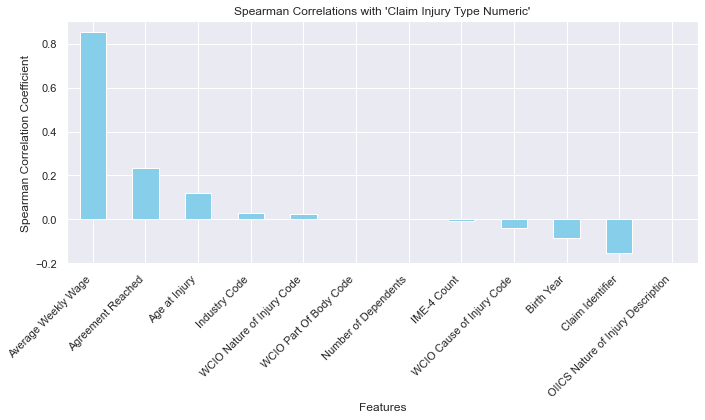

In [12]:
# Convert 'Claim Injury Type' to numeric if not already done
train_df_temp['Claim Injury Type Numeric'] = train_df_temp['Claim Injury Type'].astype('category').cat.codes

# Select only numeric columns
numeric_cols = train_df_temp.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
spearman_corr = numeric_cols.corr(method='spearman')

# Display correlations with the target variable 'Claim Injury Type Numeric'
target_correlations = spearman_corr['Claim Injury Type Numeric'].sort_values(ascending=False)

# Print the correlations
print("Spearman Correlations with 'Claim Injury Type Numeric':")
print(target_correlations)

# Plot the correlations as a bar chart for better visualization
plt.figure(figsize=(10, 6))
target_correlations.drop('Claim Injury Type Numeric').plot(kind='bar', color='skyblue')
plt.title("Spearman Correlations with 'Claim Injury Type Numeric'")
plt.ylabel("Spearman Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Strongest correlations: 

Average Weekly Wage has the highest positive correlation with the target (0.855), suggesting that there may be a strong monotonic relationship between the weekly wage and the type of claim injury.

2. Moderate Correlations:

Agreement Reached shows a moderate positive correlation (0.236), indicating that cases where an agreement was reached may be related to specific types of claim injuries.

Age at Injury has a weaker positive correlation (0.119), implying a slight relationship between age and the type of claim injury.

3. Minimal correlations:

Industry Code, WCIO Nature of Injury Code, WCIO Part Of Body Code, and Number of Dependents , Claim Identifier and Birth Year , WCIO Cause of Injury Code

So lets have a look at the features itself.

__Age at Injury__

In [13]:
train_df_temp['Age at Injury'].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

We can already see that the minimum and maximum values seem kind of strang with ranging from 0 to 117. We will deal with them in the outlier section.

In [14]:
# plot the distribution of a single feature with respect to the target categorical variable.
def feature_distribution(data, feature, target_variable):
    plt.figure(figsize=(13, 8))
    sns.histplot(data=data, x=feature, hue=target_variable, multiple="stack")
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


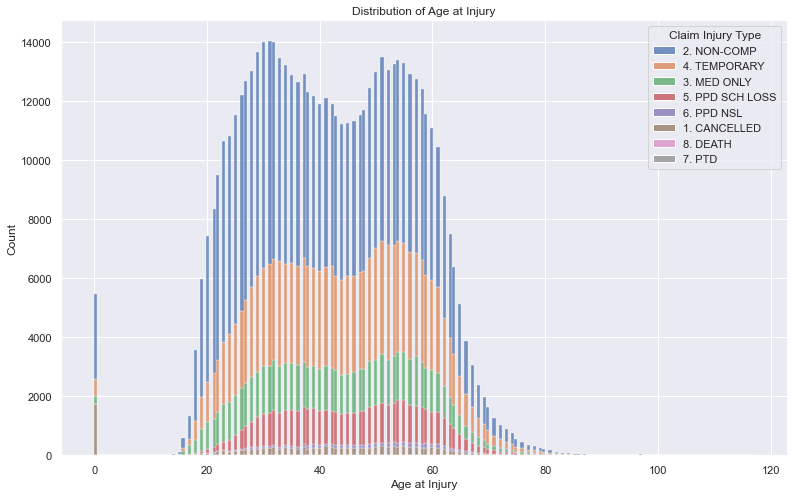

In [15]:
feature_distribution(train_df_temp, 'Age at Injury', 'Claim Injury Type')

Some conclusions on the distribution of the claim injury type related to the age can already be seen:

1. The 2. NON-COMP claim type is the most prevalent across all age groups, indicating that non-compensable cases are frequent regardless of age

2. The distribution is most concentrated between the ages of approximately 20 and 60, suggesting that most injury claims occur within the working-age population.

3. The number of claims decreases significantly for ages above 60 and below 20, indicating fewer injury claims for younger and older individuals

4. The 8. DEATH and 7. PTD (permanent total disability) claim types appear infrequently, showing they are relatively rare outcomes.

5. There is a noticeable spike in 2. NON-COMP claims for very young ages (below 20), which might indicate special cases, data anomalies, or claims related to youth employment or specific circumstances.


### 2.2 Data __Anomalies__ and __Inconsistencies__ <a id='anomalies'></a>
[to the top](#top)

Missing values analysis

In [16]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(train_df_temp)

Your selected dataframe has 34 columns.
There are 31 columns that have missing values.


In [17]:
missing_values.head(15)

,Missing Values,% of Total Values
OIICS Nature of Injury Description,593471,100.0
IME-4 Count,460668,77.6
First Hearing Date,442673,74.6
C-3 Date,406226,68.4
Birth Year,48523,8.2
Average Weekly Wage,48096,8.1
Zip Code,48082,8.1
WCIO Part Of Body Description,36527,6.2
WCIO Part Of Body Code,36527,6.2
WCIO Nature of Injury Description,35102,5.9


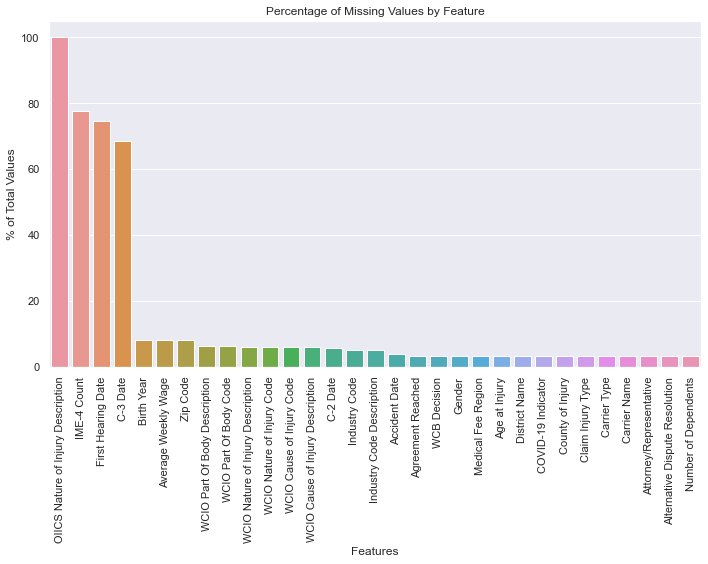

In [18]:
def plot_missing_values(mis_val_table, title):
    plt.figure(figsize=(10, 8))
    
    # Create a bar plot for the percentage of missing values
    sns.barplot(x=mis_val_table.index, 
                y=mis_val_table['% of Total Values'])
    
    # Rotate the x labels for better readability
    plt.xticks(rotation=90)
    
    # Set plot labels and title
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('% of Total Values')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the missing values
plot_missing_values(missing_values,title= 'Percentage of Missing Values by Feature')

These colums are the ones that have lots of missing values so we'll have to address them in the later section of pre-processing and data cleaning.

* OIICS Nature of Injury Description:		100.0 % 

* IME-4 Count:		77.6%

* First Hearing Date:	74.6%

* C-3 Date:		68.4% 

Null values analysis

In [19]:
# Function to calculate zero values by column
def zero_values_table(df):
    # Total zero values
    zero_val = (df == 0).sum()
    
    # Percentage of zero values
    zero_val_percent = 100 * (df == 0).sum() / len(df)
    
    # Make a table with the results
    zero_val_table = pd.concat([zero_val, zero_val_percent], axis=1)
    
    # Rename the columns
    zero_val_table_ren_columns = zero_val_table.rename(
        columns={0: 'Zero Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of zero values in descending order
    zero_val_table_ren_columns = zero_val_table_ren_columns[
        zero_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(zero_val_table_ren_columns.shape[0]) +
          " columns that have zero values.")
    
    # Return the dataframe with zero values information
    return zero_val_table_ren_columns


zero_values = zero_values_table(train_df_temp)

Your selected dataframe has 34 columns.
There are 6 columns that have zero values.


In [20]:
zero_values.head(15)

# The column Agreement Date has a high percentage of zero values because it's a binary feature and thus being equal to 0 means no Agreement Reached.

,Zero Values,% of Total Values
Agreement Reached,547239,92.2
Average Weekly Wage,335450,56.5
Number of Dependents,81665,13.8
Birth Year,25081,4.2
Claim Injury Type Numeric,12477,2.1
Age at Injury,5464,0.9


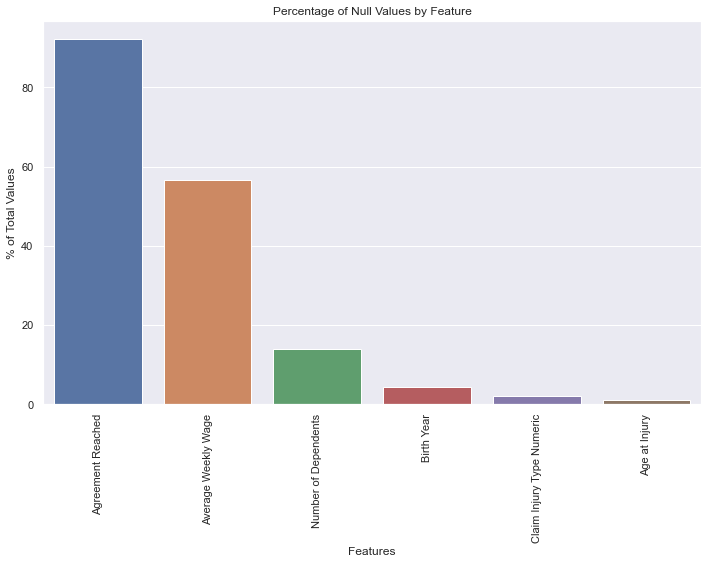

In [21]:
plot_missing_values(zero_values,title='Percentage of Null Values by Feature')

These colums are the ones that have lots of null values so we'll have to address them in the later section of pre-processing and data cleaning.

* (The column Agreement Date has a high percentage of zero values because it's a binary feature and thus being equal to 0 means no Agreement Reached)

* Average Weekly Wage:	56.5 % 

* Number of Dependents:	13.8% 

Individual Feature Analysis

In [22]:
# First, split the features into numerical and categorical

# Select numerical columns
numerical_cols = train_df_temp.select_dtypes(include=[np.number])

# Select categorical columns
categorical_cols = train_df_temp.select_dtypes(include=[object])

In [23]:
def numerical_describe(df, numerical_col):
    # Check if the column in the DataFrame is numerical
    if np.issubdtype(df[numerical_col].dtype, np.number):
        return df[numerical_col].describe()
    else:
        return None

# Iterate over the list of numerical columns
for col in numerical_cols:
    print(f"Description for column {col}:\n")
    description = numerical_describe(train_df_temp, col)
    if description is not None:
        print(description)
    else:
        print(f"Column {col} is not numerical.\n")

Description for column Age at Injury:

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64
Description for column Average Weekly Wage:

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64
Description for column Birth Year:

count    544948.000000
mean       1886.767604
std         414.644423
min           0.000000
25%        1965.000000
50%        1977.000000
75%        1989.000000
max        2018.000000
Name: Birth Year, dtype: float64
Description for column Claim Identifier:

count    5.934710e+05
mean     2.366760e+07
std      1.079271e+08
min      5.393066e+06
25%      5.593414e+06
50%      5.791212e+06
75%      5.991000e+06
max      9.998917e+08
Name: C

count    132803.000000
mean          3.207337
std           2.832303
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          73.000000
Name: IME-4 Count, dtype: float64
Description for column Industry Code:

count    564068.000000
mean         58.645305
std          19.644175
min          11.000000
25%          45.000000
50%          61.000000
75%          71.000000
max          92.000000
Name: Industry Code, dtype: float64
Description for column OIICS Nature of Injury Description:

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: OIICS Nature of Injury Description, dtype: float64
Description for column WCIO Cause of Injury Code:

count    558386.000000
mean         54.381143
std          25.874281
min           1.000000
25%          31.000000
50%          56.000000
75%          75.000000
max          99.000000
Name: WCIO Cause of Injury Code, dtype: float64
Description for col

### Summary from Individual Feature Analysis:

#### Key Points:

- **Age at Injury**: Min = 0 (missing/incorrect data), Max = 117 (possible outlier).
- **Average Weekly Wage**: Min = 0 (unreported/missing), Max = 2,828,079 (extreme outlier; 75th percentile = 841).
- **Birth Year**: Min = 0 (erroneous), Max = 2018 (unrealistic), Mean = 1886.77 (outliers likely).
- **Claim Identifier**: High variability, broad range, potentially expected as an identifier.
- **IME-4 Count**: Max = 73, indicating outliers beyond the 75th percentile of 4.
- **OIICS Nature of Injury**: Missing entirely; may need imputation/removal.
- **WCIO Part Of Body Code**: Min = -9 (data error).
- **Agreement Reached**: Mean = 4.67% of cases; shows class imbalance.
- **Number of Dependents**: Max = 6 (reasonable, needs context verification).
- **Claim Injury Type Numeric**: Min = -1 (error), 75th percentile = 3, Max = 7 (varied types, needs review).








In [24]:
def categorical_describe(df, categorical_col):
    # Check if the column in the DataFrame is categorical
    if df[categorical_col].dtype == 'object' or df[categorical_col].dtype.name == 'category':
        description = df[categorical_col].describe()
        return description
    else:
        return None

# Iterate over the list of categorical columns
for col in categorical_cols:
    print(f"Description for column {col}:\n")
    description = categorical_describe(train_df_temp, col)
    if description is not None:
        print(description)
    else:
        print(f"Column {col} is not categorical.\n")

Description for column Accident Date:

count         570337
unique          5539
top       2020-03-01
freq            1245
Name: Accident Date, dtype: object
Description for column Alternative Dispute Resolution:

count     574026
unique         3
top            N
freq      571412
Name: Alternative Dispute Resolution, dtype: object
Description for column Assembly Date:

count         593471
unique          1096
top       2020-03-06
freq            1422
Name: Assembly Date, dtype: object
Description for column Attorney/Representative:

count     574026
unique         2
top            N
freq      392291
Name: Attorney/Representative, dtype: object
Description for column C-2 Date:

count         559466
unique          2475
top       2021-05-11
freq            1847
Name: C-2 Date, dtype: object
Description for column C-3 Date:

count         187245
unique          1648
top       2021-04-21
freq             350
Name: C-3 Date, dtype: object
Description for column Carrier Name:

count       

### Summary from Individual Categorical Feature Analysis:

#### Key Points from Categorical Analysis:

- **Accident Date**: High count (570,337) and variety (5,539 unique dates), with the most frequent date being 2020-03-01 (1,245 times).

- **Alternative Dispute Resolution**: Predominantly 'N' (571,412 out of 574,026), indicating limited use of this option.

- **Assembly Date**: Complete data (593,471), with 1,096 unique dates. Most frequent date: 2020-03-06 (1,422 times).

- **Attorney/Representative**: Majority response is 'N' (392,291 out of 574,026), showing fewer cases with attorney involvement.

- **C-2 Date**: Well-populated (559,466) with 2,475 unique values. Top date: 2021-05-11 (1,847 times).

- **C-3 Date**: Lower count (187,245), indicating many missing values. Top date: 2021-04-21 (350 times).

- **Carrier Name**: Complete data (574,026) with high diversity (2,046 unique). Most frequent: STATE INSURANCE FUND (111,144 times).

- **Carrier Type**: Predominantly '1A. PRIVATE' (285,368 out of 574,026).

- **Claim Injury Type**: Common type is '2. NON-COMP' (291,078 times).

- **County of Injury**: Widely varied (63 unique), with Suffolk being the most common (60,430 times).

- **COVID-19 Indicator**: Predominantly 'N' (546,505 out of 574,026).

- **District Name**: Most cases handled in NYC (270,779 times).

- **First Hearing Date**: Lower count (150,798) with varied dates. Top date: 2022-04-15 (440 times).

- **Gender**: Majority male (335,218 out of 574,026).

- **Industry Code Description**: Common in 'HEALTH CARE AND SOCIAL ASSISTANCE' (114,339 times).

- **Medical Fee Region**: Dominated by Region IV (265,981 times).

- **WCIO Cause of Injury Description**: Most common cause: 'LIFTING' (46,610 times).

- **WCIO Nature of Injury Description**: Predominantly 'STRAIN OR TEAR' (153,373 times).

- **WCIO Part Of Body Description**: Most common part affected is 'LOWER BACK AREA' (51,862 times).

- **Zip Code**: High diversity (10,060 unique). Most frequent: 11236 (3,302 times).

- **WCB Decision**: Uniform value ('Not Work Related') across all records (574,026 times).


#### Visual Data Analysis for Numerical Features after describing them

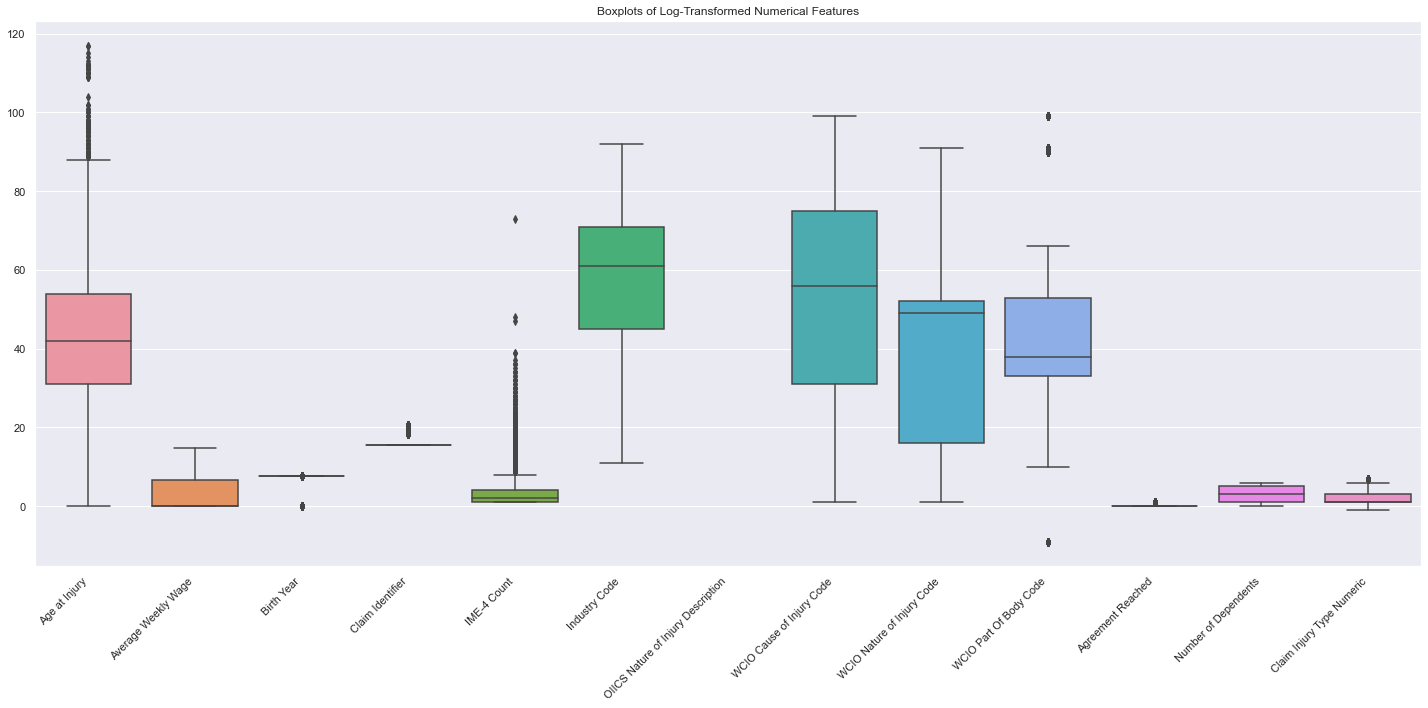

In [25]:
# Plot boxplots for all numerical features in a compact manner
num_cols_count = len(numeric_cols.columns)

# Apply log transformation to variables with extreme scales to improve visualization
numeric_cols_log = numeric_cols.copy()
for col in numeric_cols_log.columns:
    if numeric_cols_log[col].max() > 1000:  # Apply to columns with high values
        numeric_cols_log[col] = np.log1p(numeric_cols_log[col])  # log1p to handle zero values safely

# Plot boxplots for the log-transformed numerical features
plt.figure(figsize=(20, 10))  # Adjust size for better readability
sns.boxplot(data=numeric_cols_log)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of Log-Transformed Numerical Features')
plt.tight_layout()
plt.show()

### Observations from Boxplots of Log-Transformed Numerical Features:

1. **Age at Injury**:
   - Wide spread with outliers extending past 100, indicating variability in the data and potential outliers at older ages.

2. **Average Weekly Wage**:
   - Compact distribution with some outliers. Also, > 50% of the values are 0 so we'll have to take that into account


3. **Birth Year**:
   - Narrow range with a few outliers, which could indicate data entry errors or edge cases (e.g., very low or high years).

4. **Claim Identifier**:
   - Tight distribution, suggesting it is likely an ID rather than a useful variable for analysis. Outliers could represent different data entry segments.

5. **IME-4 Count**:
   - Many outliers present, indicating that while most counts are low, there are some significantly higher values.

6. **Industry Code**:
   - Relatively even distribution with few outliers, suggesting a spread across different codes.

7. **WCIO Codes (Cause, Nature, Part of Body)**:
   - Moderate spread with some outliers, indicating variability in reported injury data.

8. **Agreement Reached**:
   - Minimal spread, confirming that it is a binary var. or, with only a few outliers.

9. **Number of Dependents**:
   - Narrow range with a few outliers, indicating most values cluster tightly with some higher counts.

10. **Claim Injury Type Numeric (Target Var.)**:
    - Tight distribution with a few outliers, indicating that most data points fall within a small range but some deviations exist.
    - Given the class distribution analysis shown in the bar chart, it's clear that most instances are concentrated in a few categories, which aligns with the narrow spread observed in the boxplot.
    - The presence of outliers could represent rarer claim types, which may be difficult for models to predict due to limited examples in these categories.


#### Individual Analysis in Numerical Features

__Birth Year__

This variable results from accident date and age at accident. Therefore, we do not need it as it does not add any new information.

In [26]:
train_df_temp = train_df_temp.drop(columns='Birth Year')

In [27]:
test_df = test_df.drop(columns='Birth Year')

Analysis in the numerical variables that left (Age at Injury, Avg. Weekly Wage, Claim identifier, IME-4 Count, Nr. of Dependents)

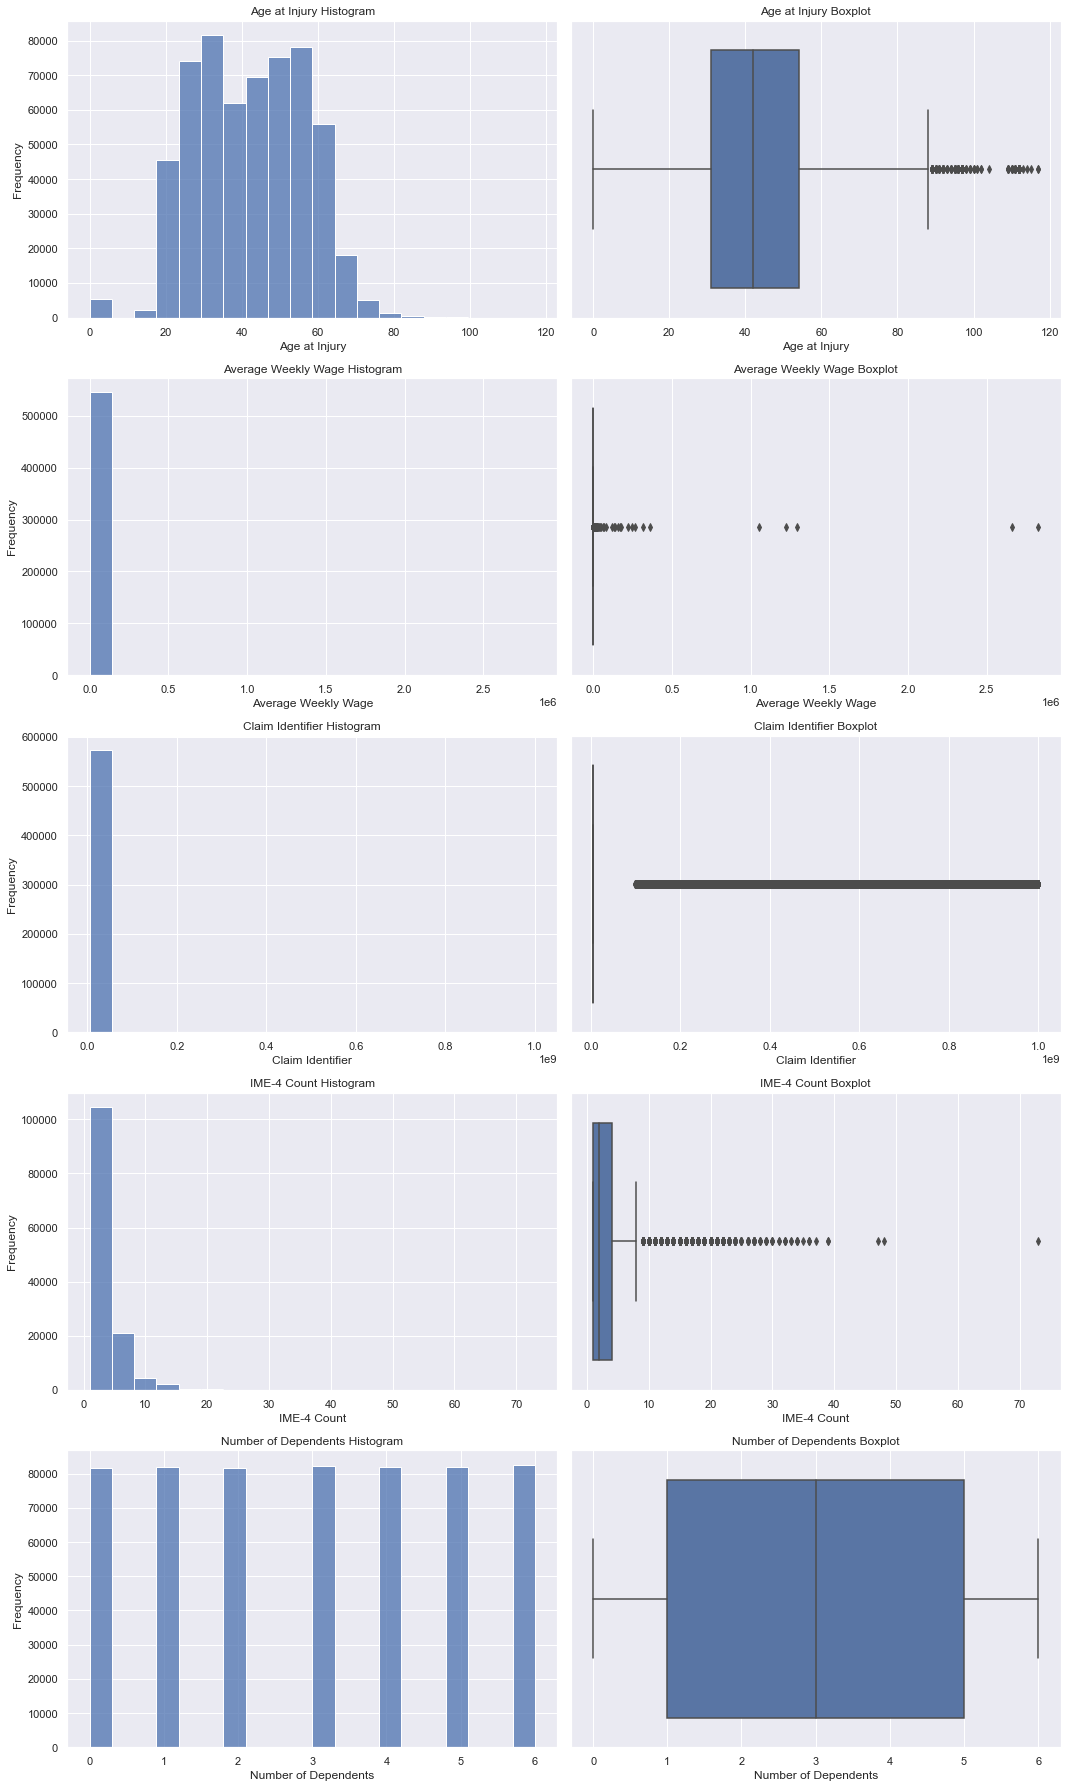

In [28]:
subset_numerical = train_df_temp[['Age at Injury', 'Average Weekly Wage', 
       'Claim Identifier', 'IME-4 Count',
       'Number of Dependents']].select_dtypes(include=[np.number])

# Create subplots for each numerical variable
n_vars = len(subset_numerical.columns)
fig, axes = plt.subplots(n_vars, 2, figsize=(15, 5*n_vars))

# Create histogram and boxplot for each variable
for i, col in enumerate(subset_numerical.columns):
    # Histogram
    sns.histplot(data=train_df_temp, x=col, bins=20, kde=False, ax=axes[i,0])
    axes[i,0].set_title(f'{col} Histogram')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(data=train_df_temp, x=col, ax=axes[i,1])
    axes[i,1].set_title(f'{col} Boxplot')
    axes[i,1].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


1. **Age at Injury**:
   - **Histogram**: The distribution shows that most cases are clustered around ages 20–50, indicating that the majority of injuries occur in working-age adults.
   - **Boxplot**: There are some outliers above 60, suggesting that injuries among older individuals are less common but do occur.

2. **Average Weekly Wage**:
   - **Histogram**: The distribution appears highly skewed, with most data points concentrated at lower values, potentially indicating the prevalence of lower wage cases.
   - **Boxplot**: A significant number of extreme outliers, suggesting that while most wages are on the lower end, there are occasional cases with exceptionally high wages.

3. **Claim Identifier**:
   - **Histogram and Boxplot**: The distribution is highly uniform with minimal spread, indicating that this may be more of an identifier variable rather than an analytically meaningful one, so perhaps
   this variable can be droped or used as an index for each claim.

4. **IME-4 Count**:
   - **Histogram**: Shows that most cases have an IME-4 count of 0-5, with very few going beyond this range.
   - **Boxplot**: Highlights the presence of outliers, indicating that some claims have a notably higher number of IME-4 counts.

5. **Number of Dependents**:
   - **Histogram**: The distribution is fairly uniform, suggesting that the number of dependents varies widely without a clear trend.
   - **Boxplot**: A wider interquartile range indicates variability, with no significant outliers.

#### Visual Data Analysis for Categorical Features after describing them

In [29]:
categorical_cols.columns

Index(['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'],
      dtype='object')

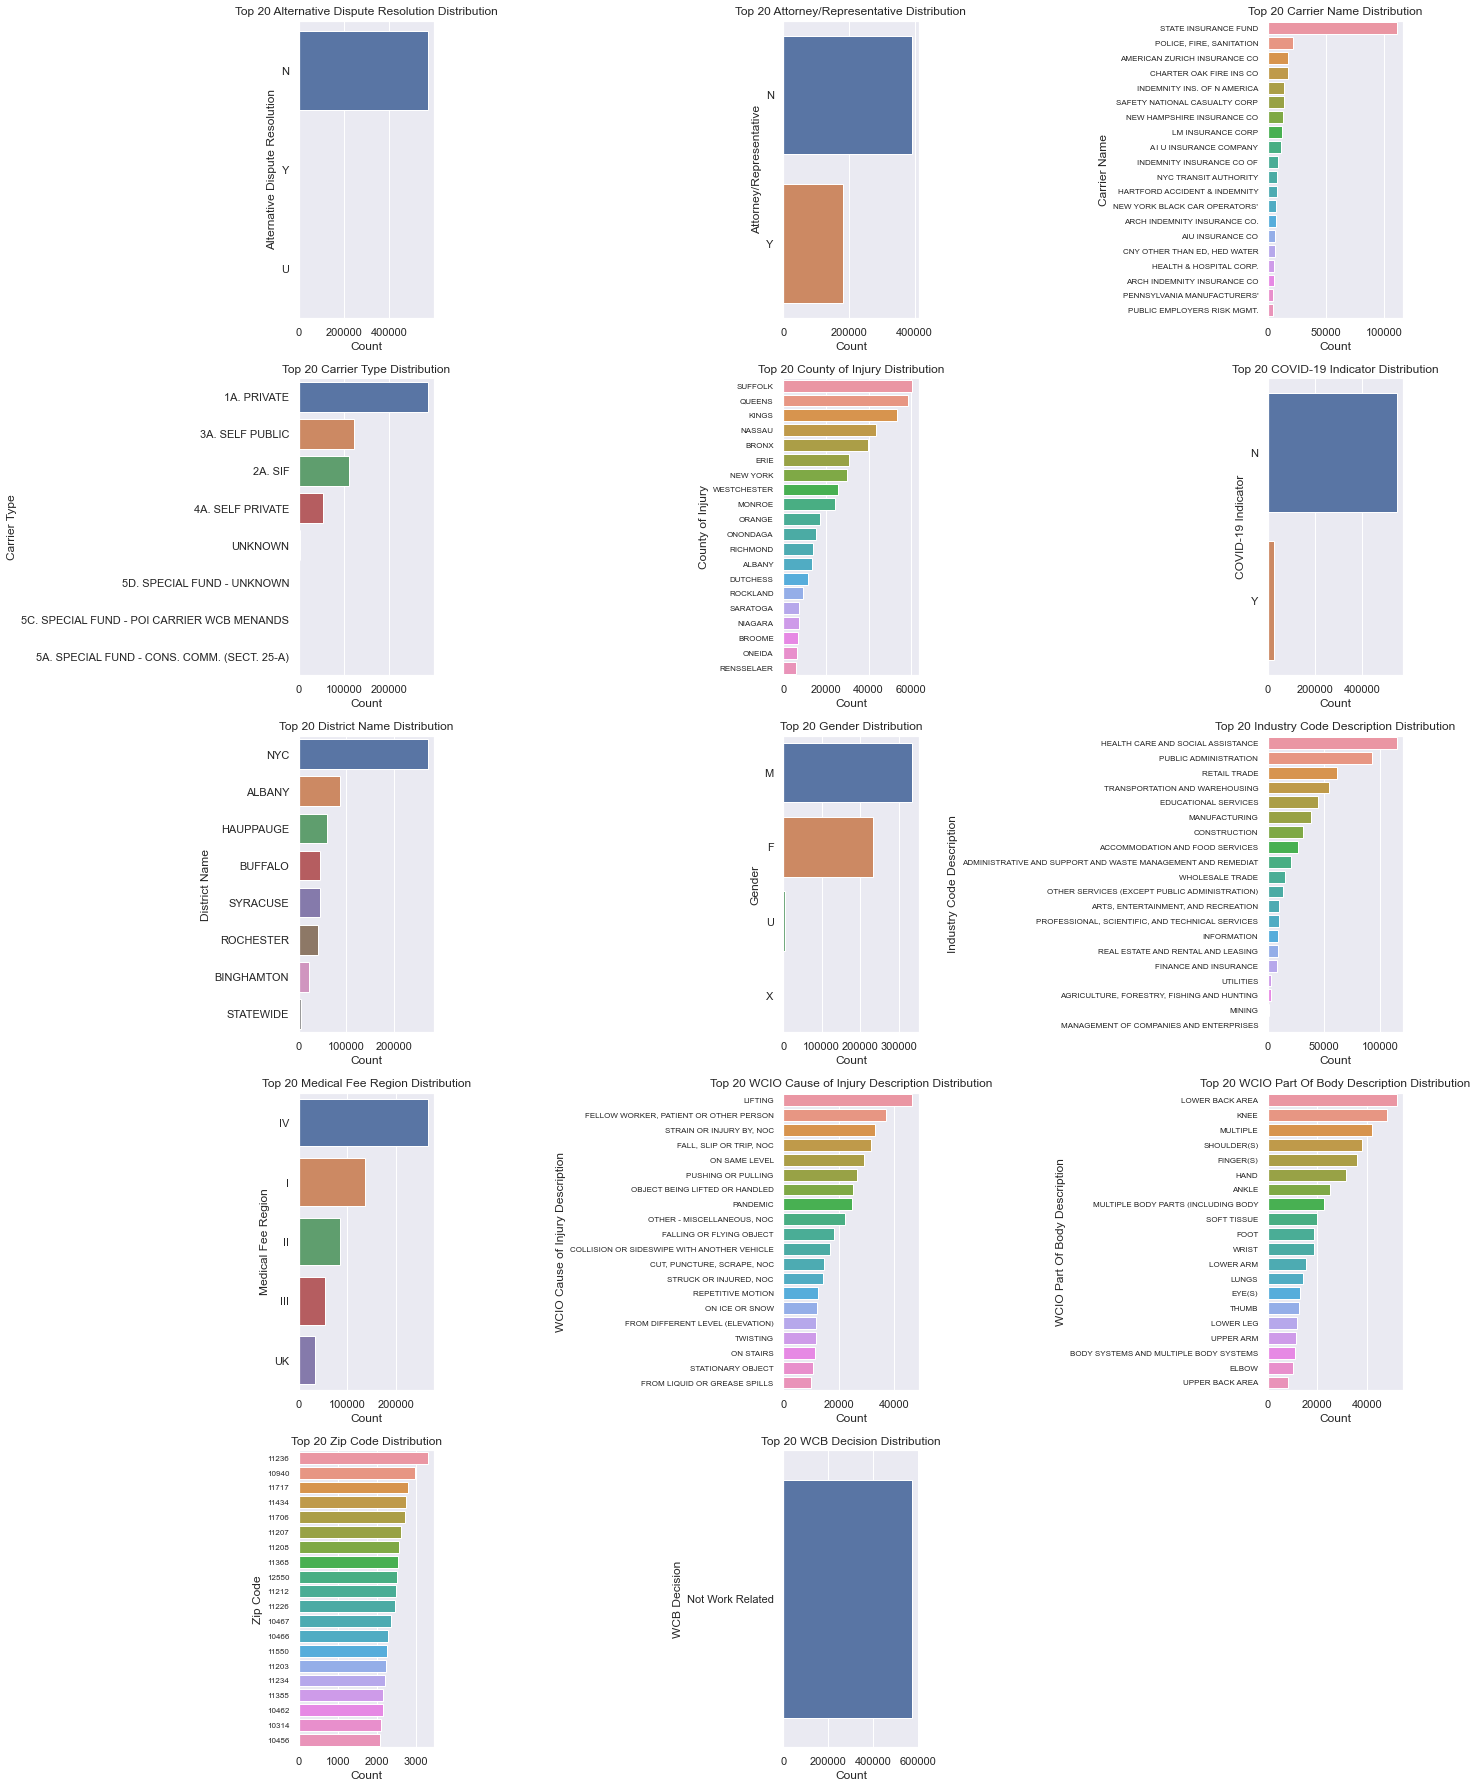

In [30]:
# Subset of categorical columns , so that we don't have dates and other features that cannot be visualized in a countplot 

subset_categorical = train_df_temp[['Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']].select_dtypes(include=[object])

# Calculate number of rows needed (3 plots per row)
n_vars = len(subset_categorical.columns)
n_rows = (n_vars // 3) + (1 if n_vars % 3 != 0 else 0)

# Create figure
plt.figure(figsize=(20, 5 * n_rows))

# Create countplot for each variable, limiting to top 20 categories where applicable
for i, col in enumerate(subset_categorical.columns, 1):
    top_20 = train_df_temp[col].value_counts().head(20).index
    filtered_data = train_df_temp[train_df_temp[col].isin(top_20)]
    
    plt.subplot(n_rows, 3, i)
    sns.countplot(data=filtered_data, y=col, order=top_20)
    plt.title(f'Top 20 {col} Distribution')
    plt.xlabel('Count')
    
    # Adjust tick labels if too long
    if train_df_temp[col].nunique() > 10:
        plt.tick_params(axis='y', labelsize=8)

# Adjust layout
plt.tight_layout()
plt.show()



1. **Alternative Dispute Resolution & Attorney/Representative**:
   - The vast majority of cases do not involve alternative dispute resolution or attorney representation, indicating that most claims may be handled without these aspects.

2. **Carrier Name & Carrier Type**:
   - A small subset of carrier names appears frequently, suggesting a concentration of claims among a few key carriers. The distribution of carrier types is dominated by 'Private' and 'Self-Public' types, with a significant number of claims from the 'SF' and 'Unknown' types as well.

3. **County of Injury**:
   - Injuries are spread across many counties, but a few counties, like Suffolk and Nassau, have significantly higher counts, indicating regional concentrations of claims.

4. **COVID-19 Indicator**:
   - Most claims do not have a COVID-19 indicator, suggesting that COVID-19-related claims are less frequent in the dataset.

5. **District Name**:
   - The majority of claims are handled in the NYC district, with other districts like Albany and Hauppauge also showing notable counts.

6. **Gender**:
   - There is a higher count of male claimants compared to female claimants, with some cases marked as 'Unknown' or 'X'.

7. **Industry Code Description**:
   - The top industries involved in claims include health care, public administration, and construction, highlighting these sectors as more prone to work-related injuries.

8. **Medical Fee Region**:
   - Most cases fall under a few primary medical fee regions, with 'IV' and 'UK' being notably common.

9. **WCIO Cause of Injury Description**:
   - Lifting, falling, and repetitive motion are among the most common causes of injury, indicating typical work-related injuries.

10. **WCIO Part of Body Description**:
    - Injuries commonly involve the lower back, knees, and multiple parts, suggesting frequent musculoskeletal issues.

11. **Zip Code**:
    - The top 20 zip codes indicate that certain areas contribute more significantly to the dataset, possibly correlating with high population or working places areas.

12. **WCB Decision**:
    - The decision distribution shows that the majority of cases are categorized as 'Not Work Related,' which could imply a high rate of non-compensable claims or initial rejections.

### 2.3 __Data Codes to Descriptions__ Analysis <a id='data_codes'></a>
[to the top](#top)

__Code and Description Variables__

For the Industry Code & Industry Code Description variables, as well as for the WCIO variables, we want to check their relationship.

In [31]:
def analyze_code_description_relationship(data, code_column, description_column):
    # Step 1: Count unique descriptions per code
    code_to_description = data.groupby(code_column)[description_column].nunique()
    # Check if each code maps to a single unique description
    if code_to_description.max() == 1:
        print(f"\nEach {code_column} has only one unique {description_column}.")
    else:
        print(f"\nSome {code_column}s have multiple {description_column}s associated with them.")

    # Step 2: Count unique codes per description
    description_to_code = data.groupby(description_column)[code_column].nunique()
    # Check if each description maps to a single unique code
    if description_to_code.max() == 1:
        print(f"\nEach {description_column} has only one unique {code_column}.")
    else:
        print(f"\nSome {description_column}s have multiple {code_column}s associated with them.")

    # Step 3: Validate if there is a 1:1 relationship
    is_one_to_one = (code_to_description.max() == 1) and (description_to_code.max() == 1)
    if is_one_to_one:
        print(f"\n{code_column} and {description_column} have a 1:1 relationship.")
    else:
        print(f"\nThere is no 1:1 relationship between {code_column} and {description_column}.")

    # Step 4: Find descriptions with multiple unique associated codes
    description_to_unique_codes = data.groupby(description_column)[code_column].apply(lambda x: list(set(x)))
    descriptions_with_multiple_unique_codes = description_to_unique_codes[description_to_unique_codes.apply(len) > 1]
    
    print(f"\nDescriptions with multiple unique associated {code_column}s:")
    print(descriptions_with_multiple_unique_codes)

__Industry Code / Industry Code Description__

In [32]:
analyze_code_description_relationship(train_df_temp, 'Industry Code', 'Industry Code Description')


Each Industry Code has only one unique Industry Code Description.

Some Industry Code Descriptions have multiple Industry Codes associated with them.

There is no 1:1 relationship between Industry Code and Industry Code Description.

Descriptions with multiple unique associated Industry Codes:
Industry Code Description
MANUFACTURING                     [32.0, 33.0, 31.0]
RETAIL TRADE                            [44.0, 45.0]
TRANSPORTATION AND WAREHOUSING          [48.0, 49.0]
Name: Industry Code, dtype: object


* MANUFCTURING is associated with codes: 32, 33 and 31 

* RETRAIL TRADE is associated with codes: 44 and 45 

* TRANSPORTATION AND WAREHOUSING with codes: 48 and 49

For each __Industry Code__, the first check shows that each code corresponds to only one unique description. This indicates that every industry code maps to a single description.

Since each Industry Code uniquely maps to one Industry Code Description, we can delete the Industry Code and only keep its corresponding description. We will keep the description variable because we have more information within it that we will use for binning / mapping later. Since we have almost the same withformation in both variables, we don't need to keep both since it would distort the data for the models.

__WCIO Cause of Injury Code / WCIO Cause of Injury Description__

In [33]:
analyze_code_description_relationship(train_df_temp, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')


Each WCIO Cause of Injury Code has only one unique WCIO Cause of Injury Description.

Some WCIO Cause of Injury Descriptions have multiple WCIO Cause of Injury Codes associated with them.

There is no 1:1 relationship between WCIO Cause of Injury Code and WCIO Cause of Injury Description.

Descriptions with multiple unique associated WCIO Cause of Injury Codes:
WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    [17.0, 66.0, 79.0]
REPETITIVE MOTION                       [97.0, 94.0]
Name: WCIO Cause of Injury Code, dtype: object


* OBJECT BEING LIFTED OR HANDLED  is associated with codes: 17, 66 and 79 

* REPETITIVE MOTION is associated with codes: 97 and 94 

For __WCIO Cause of Injury Code / Description__ it is the same as for __Industry Code / Description__. It shows that each code corresponds to only one unique description. This indicates that every code maps to a single description. However, some __WCIO Cause of Injury Descriptions__ map to more than one WCIO Cause of Injury Code. We will also just keep the __WCIO Cause of Injury Description.__

__WCIO Nature of Injury Code / WCIO Nature of Injury Description__

In [34]:
analyze_code_description_relationship(train_df_temp, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Each WCIO Nature of Injury Code has only one unique WCIO Nature of Injury Description.

Each WCIO Nature of Injury Description has only one unique WCIO Nature of Injury Code.

WCIO Nature of Injury Code and WCIO Nature of Injury Description have a 1:1 relationship.

Descriptions with multiple unique associated WCIO Nature of Injury Codes:
Series([], Name: WCIO Nature of Injury Code, dtype: object)


Since the Code and the Description have a 1:1 relationship, we will delete __WCIO Nature of Injury Code__. We decided to keep the description insted of the code to later map into groups. This can be done better with the descriptions than the code because we have more information in the descriptions.

__WCIO Part Of Body Code / WCIO Part Of Body Description__

In [35]:
analyze_code_description_relationship(train_df_temp, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')


Each WCIO Part Of Body Code has only one unique WCIO Part Of Body Description.

Some WCIO Part Of Body Descriptions have multiple WCIO Part Of Body Codes associated with them.

There is no 1:1 relationship between WCIO Part Of Body Code and WCIO Part Of Body Description.

Descriptions with multiple unique associated WCIO Part Of Body Codes:
WCIO Part Of Body Description
DISC           [43.0, 22.0]
SOFT TISSUE    [25.0, 18.0]
SPINAL CORD    [47.0, 23.0]
Name: WCIO Part Of Body Code, dtype: object


* DISC  is associated with codes: 43 and 22 

* SOFT TISSUE is associated with codes: 25 and 18

* SPINAL CORD is associated w/codes: 47 and 23

For __WCIO Part Of Body Code / Description__ it is the same as for __Industry Code / Description__ and __WCIO Cause of Injury Code / Description__. It shows that each code corresponds to only one unique description. We will also just keep the __WCIO Part Of Body Description__ for further mapping reasons.

## 3. Data Cleaning and Pre-processing <a id='dataclean'></a>
[to the top](#top)

### 3.1 Train-Validation Split <a id='split'></a>
[to the top](#top)

All the pre-processing should be done after applying Train Test Split, so that we don't inccur in data leakage, so  any transformations or imputations are fit only on the training set and then applied to the validation/test set. Th eTrain Test split has already been done by the data being in different datasets. We are performing a Train-Validation split here.

In [36]:
# Define X and y
X = train_df_temp.drop(columns=['Claim Injury Type'])
y = train_df_temp['Claim Injury Type']

# Drop rows with missing values in the target variable y
y = y.dropna()

# Ensure X and y are aligned after dropping missing values
X = X.loc[y.index]

In [37]:
# Split the data
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Set up the StratifiedShuffleSplit with one split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

# Check if each class is represented
print("Classes in training set:", y_train.unique())
print("Classes in validation set:", y_val.unique())

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Classes in training set: ['4. TEMPORARY' '3. MED ONLY' '2. NON-COMP' '5. PPD SCH LOSS'
 '1. CANCELLED' '6. PPD NSL' '8. DEATH' '7. PTD']
Classes in validation set: ['3. MED ONLY' '4. TEMPORARY' '5. PPD SCH LOSS' '2. NON-COMP' '7. PTD'
 '1. CANCELLED' '6. PPD NSL' '8. DEATH']
Training set size: 459220
Validation set size: 114806


In [38]:
# Rename the test dataset and perform imputations / mappings as well on the traing as on the testset
X_test = test_df.copy()

### 3.2 Imputations <a id='imputations'></a>
[to the top](#top)

The first look at the missing values reveals four insights:
1. There exist __only two__ variables __without missing values__ (Assembly Date and Claim Identifier)
2. There exists __one__ variable with __only missing values__ (OIICS Nature of Injury Description). This variable will be dropped directly.
3. There exist __three__ variables with missing values ranging from __68% - 78%__, which might be dropped.
4. Several variabes show the __same amount of missing values__ (3.28% and 5.91%)
5. Our target variable __"Claim Injury Type"__ has __19445 missing values__. The respective rows can be dropped because imputation of the target variable introduces artificial outcomes, creating bias and compromising the integrity of our model.

In [39]:
# Copy of data for preprocessing
X_train_df_prep = X_train.copy()

# Drop the variable with only missing values
X_train_df_prep = X_train_df_prep.drop(columns='OIICS Nature of Injury Description')
X_val_prep = X_val.drop(columns='OIICS Nature of Injury Description')
X_test_prep = X_test.drop(columns='OIICS Nature of Injury Description')

In [40]:
missing_values_2 = missing_values_table(X_train_df_prep)

Your selected dataframe has 31 columns.
There are 15 columns that have missing values.


In [41]:
missing_values_2

,Missing Values,% of Total Values
IME-4 Count,353032,76.9
First Hearing Date,338679,73.8
C-3 Date,309565,67.4
Average Weekly Wage,22976,5.0
Zip Code,22828,5.0
WCIO Part Of Body Code,13611,3.0
WCIO Part Of Body Description,13611,3.0
WCIO Nature of Injury Code,12509,2.7
WCIO Nature of Injury Description,12509,2.7
WCIO Cause of Injury Code,12494,2.7


Nice! We can see that when dropping the rows with the missing target values, a lot of our features had the same missing values in these rows!

Let's have a look at the three variables with the high percentage of missing values:
- __IME-4 Count (77.62%)__: This variable describes the number of IME-4 forms received per claim. The missing values could be replaced with zeros, however, since the amout of missing values is so high, it's variance is relatively small.
- __First Hearing Date (74.59%)__: The description of the variable states that a blank date means the claim has not yet had a hearing held. The relationship between the date variables should be checked to determine if its relevant. Further, if the variable has an impact on the target variable, one idea would be to transform it into a binary variable which states if the first hearing date took place already (=1) or not (=0).
- __C-3 Date (68.45%)__: This variable means that the Date Form C-3 (Employee Claim Form) was received. It could also be transformed into a binary variable if it is important.

##### Dealing with Missing Values


In [42]:
# Select numerical columns
numeric_cols2 = X_train_df_prep.select_dtypes(include=[np.number])

# Calculate the variance of each feature (column-wise variance)
feature_variance = numeric_cols2.var()

# Calculate the median of all variances (overall median of numerical feature variances)
overall_variance_median = feature_variance.median()

# Print the median of all variances
print(f"Overall Median of Variance for Numerical Features: {overall_variance_median}")

# Compare each feature variance to the overall variance median
higher_variance_features = feature_variance[feature_variance > overall_variance_median]
lower_variance_features = feature_variance[feature_variance <= overall_variance_median]

print("\nFeatures with Variance Higher than the Overall Variance Median:")
print(higher_variance_features)

print("\nFeatures with Variance Lower or Equal to the Overall Variance Median:")
print(lower_variance_features)

Overall Median of Variance for Numerical Features: 385.7022429014136

Features with Variance Higher than the Overall Variance Median:
Average Weekly Wage           4.593574e+07
Claim Identifier              4.946283e+10
WCIO Cause of Injury Code     6.697600e+02
WCIO Nature of Injury Code    4.931989e+02
WCIO Part Of Body Code        5.009374e+02
dtype: float64

Features with Variance Lower or Equal to the Overall Variance Median:
Age at Injury                203.429308
IME-4 Count                    8.104940
Industry Code                385.702243
Agreement Reached              0.044309
Number of Dependents           4.002492
Claim Injury Type Numeric      1.269001
dtype: float64


In [43]:
# Calculate the Spearman correlation of each numerical feature with the target ('Claim Type Numeric')
feature_spearman_corr = numeric_cols2.corrwith(X_train_df_prep['Claim Injury Type Numeric'], method='spearman')

# Calculate the median of all Spearman correlations (overall median of numerical feature correlations)
overall_spearman_median = feature_spearman_corr.median()

# Print the median of all Spearman correlations
print(f"Overall Median of Spearman Correlations for Numerical Features: {overall_spearman_median}")

# Compare each feature Spearman correlation to the overall Spearman median
higher_corr_features = feature_spearman_corr[feature_spearman_corr > overall_spearman_median]
lower_corr_features = feature_spearman_corr[feature_spearman_corr <= overall_spearman_median]

print("\nFeatures with Spearman Correlation Higher than the Overall Median:")
print(higher_corr_features)

print("\nFeatures with Spearman Correlation Lower or Equal to the Overall Median:")
print(lower_corr_features)

Overall Median of Spearman Correlations for Numerical Features: 0.0232989320264118

Features with Spearman Correlation Higher than the Overall Median:
Age at Injury                0.118994
Average Weekly Wage          0.855638
Industry Code                0.029749
Agreement Reached            0.235306
Claim Injury Type Numeric    1.000000
dtype: float64

Features with Spearman Correlation Lower or Equal to the Overall Median:
Claim Identifier             -0.059367
IME-4 Count                  -0.005794
WCIO Cause of Injury Code    -0.040849
WCIO Nature of Injury Code    0.023299
WCIO Part Of Body Code       -0.001159
Number of Dependents         -0.000461
dtype: float64


Given that IME-4 Count has 77,62% of missing values and its variance is low compared to the median variance of numerical features (8 < 439) and its spearman correlation with the target is almost 0 probably it's better if we drop this variable.

In [44]:
X_train_df_prep.drop(columns=['IME-4 Count'], inplace=True)

In [45]:
# Do the same for val and test
X_val_prep.drop(columns=['IME-4 Count'], inplace=True)
X_test_prep.drop(columns=['IME-4 Count'], inplace=True)

In [46]:
X_train_df_prep.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'Claim Injury Type Numeric'],
      dtype='object')

In [47]:
# Convert columns to datetime format and handle errors
train_df_date = X_train_df_prep.copy()
train_df_date['Accident Date'] = pd.to_datetime(train_df_date['Accident Date'], errors='coerce')
train_df_date['Assembly Date'] = pd.to_datetime(train_df_date['Assembly Date'], errors='coerce')
train_df_date['C-2 Date'] = pd.to_datetime(train_df_date['C-2 Date'], errors='coerce')
train_df_date['C-3 Date'] = pd.to_datetime(train_df_date['C-3 Date'], errors='coerce')
train_df_date['First Hearing Date'] = pd.to_datetime(train_df_date['First Hearing Date'], errors='coerce')


# Convert columns to days 
reference_date = pd.Timestamp('2020-01-01')

# Convert datetime columns to numeric format (days since the reference date)
train_df_date['Accident Date Numeric'] = (train_df_date['Accident Date'] - reference_date).dt.days
train_df_date['Assembly Date Numeric'] = (train_df_date['Assembly Date'] - reference_date).dt.days
train_df_date['C-2 Date Numeric'] = (train_df_date['C-2 Date'] - reference_date).dt.days
train_df_date['C-3 Date Numeric'] = (train_df_date['C-3 Date'] - reference_date).dt.days
train_df_date['First Hearing Date Numeric'] = (train_df_date['First Hearing Date'] - reference_date).dt.days

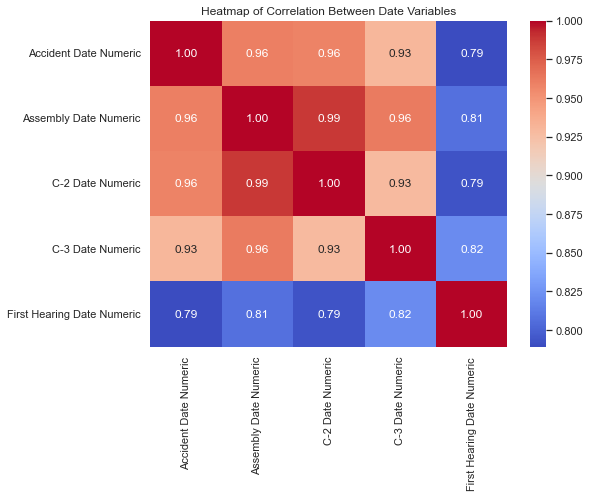

In [48]:
# Correlation matrix for date columns
correlation_matrix_date = train_df_date[['Accident Date Numeric', 'Assembly Date Numeric', 'C-2 Date Numeric', 'C-3 Date Numeric' , 'First Hearing Date Numeric']].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_date, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Heatmap of Correlation Between Date Variables')
plt.show()

* C-3 Date Numeric variable has a high correlation with other variables and 67.4% missing data, making it less informative compared to the others.

* First Hearing Date Numeric while it has the lowest correlation with the other date variables, the 73.7% missing data makes it difficult to justify its retention.

In [49]:
# Based on that we will drop C-3 Date Numeric and First Hearing Date Numeric

X_train_df_prep = X_train_df_prep.drop(columns=['C-3 Date', 'First Hearing Date'])

In [50]:
# Do the same for val and test
X_val_prep = X_val_prep.drop(columns=['C-3 Date', 'First Hearing Date'])
X_test_prep = X_test_prep.drop(columns=['C-3 Date', 'First Hearing Date'])

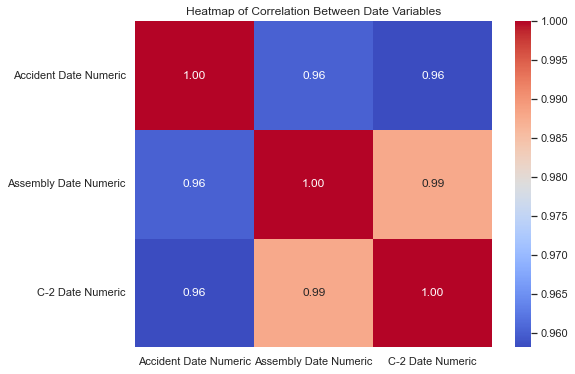

In [51]:
# Correlation matrix for date columns
correlation_matrix_date_2 = train_df_date[['Accident Date Numeric','Assembly Date Numeric' , 'C-2 Date Numeric']].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_date_2, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Heatmap of Correlation Between Date Variables')
plt.show()

In [52]:
# Calculate the correlation of each date feature with the target variable
target_correlation_2 = train_df_date[['Accident Date Numeric', 'C-2 Date Numeric','Assembly Date Numeric']].corrwith(train_df_date['Claim Injury Type Numeric'], method='spearman')

# Print the correlation results
print("Correlation with target variable:")
print(target_correlation_2) # Despite the high correlation probably the date features are not relevant for the model

Correlation with target variable:
Accident Date Numeric   -0.042653
C-2 Date Numeric        -0.046913
Assembly Date Numeric   -0.059219
dtype: float64


Despite having high correlations these variables offer different interpretations, so keep them for now is relevant. 

Since the other variables had missing values for 5% or less, let's check how many rows have no misisng values for all features.

In [53]:
# rows without missing values
rows_without_missing_values = X_train_df_prep.dropna()
num_rows_without_missing_values = len(rows_without_missing_values)

print(f"Number of rows without missing values: {num_rows_without_missing_values}")
print(f"% of rows without missing values: {round((num_rows_without_missing_values / len(X_train_df_prep)) * 100, 2)}%")

Number of rows without missing values: 399409
% of rows without missing values: 86.98%


So let's look at the other variables and how we can interpolate the missing values:

- __Average Weekly Wage__: use __median__ for missing values, since mean might be influenced by the extrem outliers we already saw; exclue wage = 0 for calculation since this seems to be some kind of mistake in the data
- __Accident Date__: drop the rows because they are only 0.6% of the remaining dataset and we can't calculate the new time features without this information. (probably droped before) 
- __C-2 Date__: Calculate average "Accident_to_C2_Lag" and compute C-2 Date by adding the amount of days to the accident day.
- __Industry Code Description__: Mode imputation, replace missing values with the most frequent category (20%)
- __WCIO Cause of Injury Description__: Mode imputation, replace missing values with the most frequent category
- __WCIO Nature of Injury Description__: Mode imputation, replace missing values with the most frequent category (27%)
- __WCIO Part Of Body Description__: Mode imputation, replace missing values with the most frequent category
- __Zip Code__: Mode imputation, replace missing values with the most frequent category



__Accident Date__

In [54]:
""" # Drop rows where the variable is missing
train_df_prep = train_df_prep.dropna(subset=['Accident Date'])

# Check the shape of the cleaned DataFrame
print(f"Remaining rows after dropping missing target values: {len(train_df_prep)}")
print(f"Percentage of the whole training data set: {round(len(train_df_prep)/len(train_df),2)*100}%") """

' # Drop rows where the variable is missing\ntrain_df_prep = train_df_prep.dropna(subset=[\'Accident Date\'])\n\n# Check the shape of the cleaned DataFrame\nprint(f"Remaining rows after dropping missing target values: {len(train_df_prep)}")\nprint(f"Percentage of the whole training data set: {round(len(train_df_prep)/len(train_df),2)*100}%") '

__C-2 Date__

In [55]:
# Calculate the average lag for known C-2 Dates
train_df_date['Accident_to_C2_Lag'] = (train_df_date['C-2 Date'] - train_df_date['Accident Date']).dt.days
average_accident_to_c2_lag = train_df_date['Accident_to_C2_Lag'].mean(skipna=True)

# Fill missing C-2 Dates by adding the average lag to Accident Date
train_df_date['C-2 Date'] = train_df_date['C-2 Date'].fillna(
    train_df_date['Accident Date'] + pd.to_timedelta(average_accident_to_c2_lag, unit='D')
)

X_train_df_prep['C-2 Date'] = train_df_date['C-2 Date'].dt.strftime('%Y-%m-%d')

print(f"Average Accident_to_C2_Lag: {average_accident_to_c2_lag} days")

Average Accident_to_C2_Lag: 70.24071420080786 days


In [56]:
X_train_df_prep['C-2 Date'].value_counts()

2021-05-11    1506
2020-03-05    1084
2021-05-27    1025
2022-08-15     921
2021-06-22     880
              ... 
2015-05-11       1
2023-12-02       1
2002-11-04       1
1998-06-29       1
2015-09-16       1
Name: C-2 Date, Length: 3045, dtype: int64

In [57]:
# Ensure datetime format
X_val_prep['Accident Date'] = pd.to_datetime(X_val_prep['Accident Date'], errors='coerce')
X_val_prep['C-2 Date'] = pd.to_datetime(X_val_prep['C-2 Date'], errors='coerce')
X_test_prep['Accident Date'] = pd.to_datetime(X_test_prep['Accident Date'], errors='coerce')
X_test_prep['C-2 Date'] = pd.to_datetime(X_test_prep['C-2 Date'], errors='coerce')


# Fill missing C-2 Dates in X_val_prep
X_val_prep['C-2 Date'] = X_val_prep['C-2 Date'].fillna(
    X_val_prep['Accident Date'] + pd.to_timedelta(average_accident_to_c2_lag, unit='D')
).dt.strftime('%Y-%m-%d')

# Fill missing C-2 Dates in X_test_prep
X_test_prep['C-2 Date'] = X_test_prep['C-2 Date'].fillna(
    X_test_prep['Accident Date'] + pd.to_timedelta(average_accident_to_c2_lag, unit='D')
).dt.strftime('%Y-%m-%d')

__Industry Code Description / WCIO Descriptions and Zip Code__

Before replacing the last missing values, let's check for the correlation between them.

In [58]:
# Calculates Cramér's V correlation between two categorical variables.
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform Chi-square test
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    
    # Calculate Cramér's V
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


In [59]:
# List of categorical columns to compare
categorical_columns = [
    'Industry Code Description',
    'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Description',
    'WCIO Part Of Body Description',
    'Zip Code'
]

# Create a DataFrame to store the correlation results
correlation_cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate pairwise Cramér's V for each combination of the variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            # Correlation with itself is always 1
            correlation_cramer_matrix.loc[col1, col2] = 1.0
        else:
            # Calculate Cramér's V for the pair
            correlation_cramer_matrix.loc[col1, col2] = cramers_v(X_train_df_prep[col1], X_train_df_prep[col2])

# Convert the results to numeric type
correlation_cramer_matrix = correlation_cramer_matrix.astype(float)


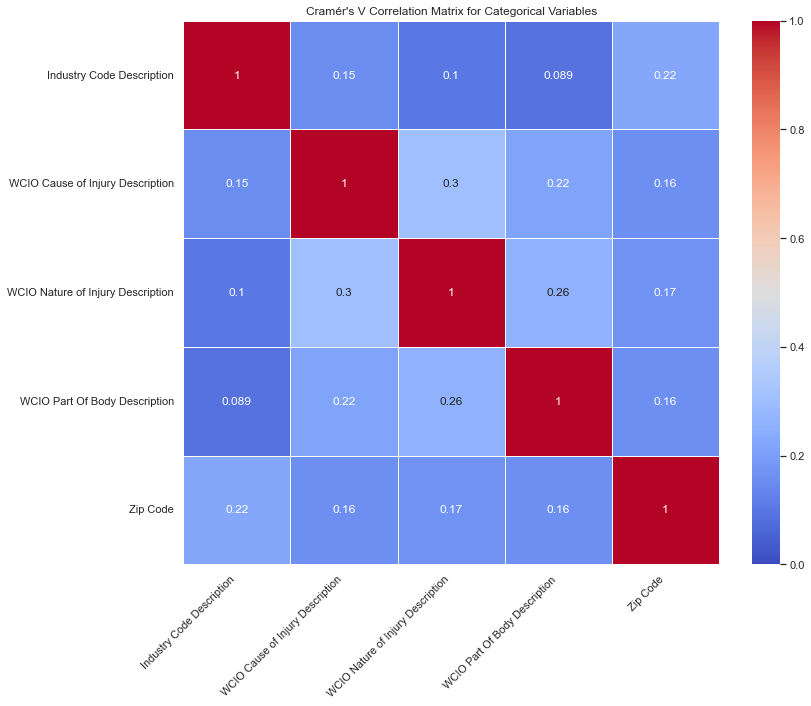

In [60]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for the Cramér's V correlation matrix
sns.heatmap(correlation_cramer_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5)

# Set the title and labels
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

The matrix indicates that most of the categorical variables are relatively independent of each other, with only one low association between WCIO Cause of Injury Description and WCIO Nature of Injury Description, so there exists no dependency between the features that could be relevant when imputing the misisng values.

For imputing the missing values of these variables, we thought about different things. 
- Firstly, imputing them with the __kNN Imputer__. Since it only works numerical data, we thought about encoding the variables and use it on the encoded data. However, since kNN works with distances and there exists no distance-relationship between the classes of our variables, we decided to not use this approach, as it might add more bias. 
- Second, we thought about __weighted randomly distributions__ for the missing values. Based on the frequency occurence of the classes, we would have created weights and fill the missing values based on these weight srandomly. However, we thought it might also introduce even more bias and artifical patterns that should not be present.

Therefore, we decided to go with the simple and prominent approach to replace the missing values with the __majority class__.

In [61]:
# Impute missing values in X_train using the mode of each column
modes = X_train_df_prep.apply(lambda col: col.mode()[0])
X_train_df_prep_final = X_train_df_prep.fillna(modes)

# Use the same modes to fill missing values in X_val and X_test
X_val_prep_final = X_val_prep.fillna(modes)
X_test_prep_final = X_test_prep.fillna(modes)

In [62]:
# Check if all missing values are handled
missing_values_3 = missing_values_table(X_train_df_prep_final)

Your selected dataframe has 28 columns.
There are 0 columns that have missing values.


In [63]:
missing_values_4 = missing_values_table(X_val_prep_final)

Your selected dataframe has 28 columns.
There are 0 columns that have missing values.


In [64]:
missing_values_5 = missing_values_table(X_test_prep_final)

Your selected dataframe has 25 columns.
There are 0 columns that have missing values.


Weighted randomly distributions for the missing values:

In [65]:
""" # Calculate the frequency distribution (weights) for the 'Industry Code' column
industry_counts = train_df_prep['Industry Code Description'].value_counts(normalize=True)

# Create a list of possible values and their corresponding weights
categories = industry_counts.index.tolist()
weights = industry_counts.values.tolist()

# Impute missing values based on the weighted distribution
# np.random.choice randomly selects from the categories based on their weights
train_df_prep['Industry Code Description'] = train_df_prep['Industry Code Description'].apply(lambda x: np.random.choice(categories, p=weights) if pd.isna(x) else x) """


" # Calculate the frequency distribution (weights) for the 'Industry Code' column\nindustry_counts = train_df_prep['Industry Code Description'].value_counts(normalize=True)\n\n# Create a list of possible values and their corresponding weights\ncategories = industry_counts.index.tolist()\nweights = industry_counts.values.tolist()\n\n# Impute missing values based on the weighted distribution\n# np.random.choice randomly selects from the categories based on their weights\ntrain_df_prep['Industry Code Description'] = train_df_prep['Industry Code Description'].apply(lambda x: np.random.choice(categories, p=weights) if pd.isna(x) else x) "

__Dropping Industries Codes as previously seen that they don't obey 1:1 relationship__

In [66]:
X_train_df_prep_final = X_train_df_prep_final.drop(columns='Industry Code')
X_train_df_prep_final = X_train_df_prep_final.drop(columns='WCIO Cause of Injury Code')
X_train_df_prep_final = X_train_df_prep_final.drop(columns='WCIO Nature of Injury Code')
X_train_df_prep_final = X_train_df_prep_final.drop(columns='WCIO Part Of Body Code')

X_val_prep_final = X_val_prep_final.drop(columns='Industry Code')
X_val_prep_final = X_val_prep_final.drop(columns='WCIO Cause of Injury Code')
X_val_prep_final = X_val_prep_final.drop(columns='WCIO Nature of Injury Code')
X_val_prep_final = X_val_prep_final.drop(columns='WCIO Part Of Body Code')

X_test_prep_final = X_test_prep_final.drop(columns='Industry Code')
X_test_prep_final = X_test_prep_final.drop(columns='WCIO Cause of Injury Code')
X_test_prep_final = X_test_prep_final.drop(columns='WCIO Nature of Injury Code')
X_test_prep_final = X_test_prep_final.drop(columns='WCIO Part Of Body Code')

### 3.3 Outliers Handling <a id='outliers_handling'></a>
[to the top](#top)

#### Numerical Features

#### __Age at Injury__

In [67]:
X_train_df_out = X_train_df_prep_final.copy()

In [68]:
numerical_cols.columns

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year',
       'Claim Identifier', 'IME-4 Count', 'Industry Code',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents',
       'Claim Injury Type Numeric'],
      dtype='object')

Text(24.335, 0.5, 'Boxplot')

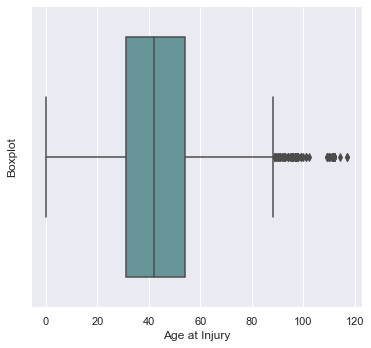

In [69]:
sns.catplot(data=X_train_df_out, kind='box', x='Age at Injury', color='cadetblue')
plt.xlabel('Age at Injury')
plt.ylabel('Boxplot')

# Outliers after 85 years old

In [70]:
# Total number of rows in the DataFrame
total_rows = len(X_train_df_out)

# Count rows with 'Age at Injury' below 14
below_14_count = X_train_df_out[X_train_df_out['Age at Injury'] < 14].shape[0]
below_14_percentage = (below_14_count / total_rows) * 100

# Count rows with 'Age at Injury' over 90
over_90_count = X_train_df_out[X_train_df_out['Age at Injury'] > 90].shape[0]
over_90_percentage = (over_90_count / total_rows) * 100

# Print the results
print(f"Number of rows with 'Age at Injury' below 14: {below_14_count} ({below_14_percentage:.2f}%)")
print(f"Number of rows with 'Age at Injury' over 90: {over_90_count} ({over_90_percentage:.2f}%)")

Number of rows with 'Age at Injury' below 14: 4400 (0.96%)
Number of rows with 'Age at Injury' over 90: 134 (0.03%)


In [71]:
# Drop rows with 'Age at Injury' below 14 or over 90
train_df_out_cleaned = X_train_df_out[(X_train_df_out['Age at Injury'] >= 14) & (X_train_df_out['Age at Injury'] <= 90)]

# Reset the index after dropping rows
train_df_out_cleaned.reset_index(drop=True, inplace=True)

# Print the number of rows in the cleaned DataFrame
print(f"Number of rows after removing outliers: {train_df_out_cleaned.shape[0]}")
print(f"Percentage of the whole training data set: {round(len(train_df_out_cleaned)/len(train_df),2)*100}%")

Number of rows after removing outliers: 454686
Percentage of the whole training data set: 77.0%


To deal with the outliers of "Average Weekly Wage", we will use binning such that the 0 values are one category and the high outliers will be in one category and don't bias the data too much.

#### __Average Weekly Wage__

In [72]:
# Ensuring no negative wages
train_df_out_cleaned['Average Weekly Wage'] = train_df_out_cleaned['Average Weekly Wage'].clip(lower=0)

# Calculate IQR for 'Average Weekly Wage'
Q1 = train_df_out_cleaned['Average Weekly Wage'].quantile(0.25)
Q3 = train_df_out_cleaned['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1

# Set thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display results
lower_bound, upper_bound, IQR

(-1200.25125, 2000.41875, 800.1675)

In [73]:
# Check for negative values
print(train_df_out_cleaned[train_df_out_cleaned['Average Weekly Wage'] < 0])

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, C-2 Date, Carrier Name, Carrier Type, Claim Identifier, County of Injury, COVID-19 Indicator, District Name, Gender, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Description, WCIO Nature of Injury Description, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents, Claim Injury Type Numeric]
Index: []


In [74]:
# Filter outliers based on the adjusted bounds
outliers = train_df_out_cleaned[(train_df_out_cleaned['Average Weekly Wage'] < lower_bound) | 
                                (train_df_out_cleaned['Average Weekly Wage'] > upper_bound)]

# Display the outliers
print("Number of outliers detected:", len(outliers))

len(outliers) / len(train_df_out_cleaned)  # Percentage of outliers , which is below % so we can remove them

Number of outliers detected: 20871


0.04590200709940486

In [75]:
# Remove outliers
train_df_no_outliers = train_df_out_cleaned[(train_df_out_cleaned['Average Weekly Wage'] >= lower_bound) & 
                                             (train_df_out_cleaned['Average Weekly Wage'] <= upper_bound)]

<AxesSubplot:xlabel='Average Weekly Wage'>

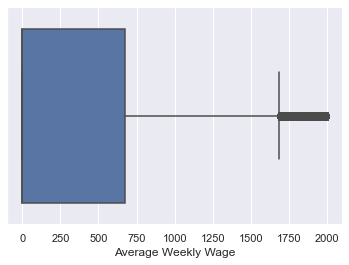

In [76]:
sns.boxplot(train_df_no_outliers['Average Weekly Wage'])

In [77]:
# Impute missing values with the median of non-zero values

# Calculate the median of non-zero values in the 'Average Weekly Wage' column
median_value = train_df_no_outliers.loc[train_df_no_outliers['Average Weekly Wage'] > 0, 'Average Weekly Wage'].median()

# Impute 0 values with the median
train_df_no_outliers['Average Weekly Wage'] = train_df_no_outliers['Average Weekly Wage'].replace(0, median_value)

# Display the updated DataFrame to confirm changes
print("Median value used for imputation:", median_value , '\n')

print("Count values after imputation:", (train_df_no_outliers['Average Weekly Wage']))

Median value used for imputation: 973.94 

Count values after imputation: 0          744.06
1          845.29
2          973.94
3          973.94
4          668.08
           ...   
454681     973.94
454682    1244.56
454683     969.26
454684     794.09
454685     973.94
Name: Average Weekly Wage, Length: 433815, dtype: float64


In [78]:
train_df_no_outliers['Average Weekly Wage'].describe()

count    433815.000000
mean        988.451817
std         266.704928
min          13.940000
25%         973.940000
50%         973.940000
75%         973.940000
max        2000.330000
Name: Average Weekly Wage, dtype: float64

<AxesSubplot:xlabel='Average Weekly Wage'>

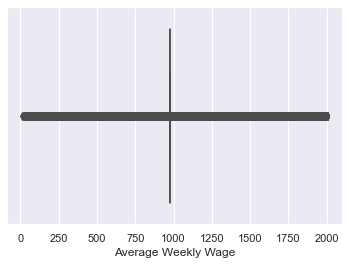

In [79]:
sns.boxplot(train_df_no_outliers['Average Weekly Wage'])

As we can see , the average weekly wage has 358755 0 values, and that's more than 50% of our data set, so imputing with the median will skew a lot the data and produce an uniform distribution.

A better approach is probably treat 0 values as a separate category to avoid skewing the data, and analyze the rest of the data, so that's what we're going to do and bin data.

__Agreement Reached__

In [80]:
X_train_df_out['Agreement Reached'].value_counts() 

0.0    437881
1.0     21339
Name: Agreement Reached, dtype: int64

We have a big class imbalance here, so we'll have to take that into consideration when modelling using for example class weighting or SMOTE technique.

__Number of Dependents__

In [81]:
dependent_counts = X_train_df_out['Number of Dependents'].value_counts() 

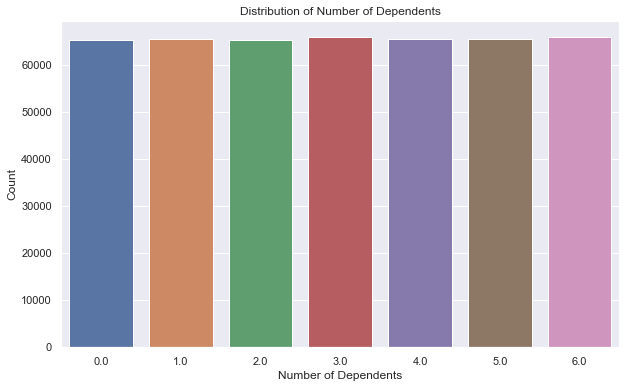

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dependent_counts.index, y=dependent_counts.values)
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

The Number of Dependents variable has a discrete, uniform-like distribution across all possible values (0 to 6). Since the counts for each category are fairly balanced and there are no extreme values , outlier removal is not needed for this feature.

### 3.4 Binning and Feature Extraction <a id='binning'></a>
[to the top](#top)

__Binning__:
- __Age at Injury__: Bin into 10-year age groups
- __Average Weekly Wage__: Group wages into ranges to handle the wide variance
- __Gender__: Combine "X" and "U" into an "Other" category for non-binary classifications
- __WCIO Cause of Injury Description__: Group similar injury causes together for a consolidated view of cause categories
- __WCIO Nature of Injury Description__: Group similar injury types (e.g., physical trauma, diseases) to capture broader injury classifications
- __WCIO Part Of Body Description__: Combine specific body parts into larger areas (e.g., "Upper Arm" and "Shoulder" into "Upper Arm and Shoulder") to simplify the body region analysis


In [153]:
train_df_bin = X_train_df_out.copy()

In [154]:
X_val_bin = X_val_prep_final.copy()
X_test_bin = X_test_prep_final.copy()

In [155]:
# Group "Age at Injury" and "Average Weekly Wage" into Bins

# Define age bins and labels
age_bins = [0, 19, 29, 39, 49, 59, float('inf')]
age_labels = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60 and above']

# Create the age groups
train_df_bin['Age_Group'] = pd.cut(train_df_bin['Age at Injury'], bins=age_bins, labels=age_labels)

# Group Average Weekly Wage into bins
# Define adjusted wage bins and labels
wage_bins = [-np.inf, 1, 700, 1100, 1500, max(train_df_bin['Average Weekly Wage']) + 1]  # Use -np.inf to include 0.00
wage_labels = ['Zero', 'Below Average', 'Average', 'Above Average', 'High']

# Create the wage groups
train_df_bin['Wage_Group'] = pd.cut(train_df_bin['Average Weekly Wage'], bins=wage_bins, labels=wage_labels)

# Check the distribution of the wage groups
print(train_df_bin['Wage_Group'].value_counts())


Zero             291119
High              47124
Average           45039
Below Average     41981
Above Average     33957
Name: Wage_Group, dtype: int64


In [156]:
# Create the age groups for val and test
X_val_bin['Age_Group'] = pd.cut(X_val_bin['Age at Injury'], bins=age_bins, labels=age_labels)
X_test_bin['Age_Group'] = pd.cut(X_test_bin['Age at Injury'], bins=age_bins, labels=age_labels)

# Create the wage groups for val and test
X_val_bin['Wage_Group'] = pd.cut(X_val_bin['Average Weekly Wage'], bins=wage_bins, labels=wage_labels)
X_test_bin['Wage_Group'] = pd.cut(X_test_bin['Average Weekly Wage'], bins=wage_bins, labels=wage_labels)

#### __Wage Category__

In [157]:
train_df_bin['Wage_Group'].value_counts()

Zero             291119
High              47124
Average           45039
Below Average     41981
Above Average     33957
Name: Wage_Group, dtype: int64

<AxesSubplot:xlabel='Wage_Group', ylabel='count'>

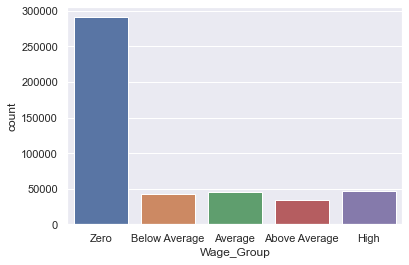

In [158]:
# Plot the distribution of Wage Groups
sns.countplot(x='Wage_Group', data=train_df_bin)

In [159]:
# Mapping categorical variables

# Gender: Combine "U" and "X" into "Other"
train_df_bin['Gender'] = train_df_bin['Gender'].replace({'U': 'Other', 'X': 'Other'})

# val and test
X_val_bin['Gender'] = X_val_bin['Gender'].replace({'U': 'Other', 'X': 'Other'})
X_test_bin['Gender'] = X_test_bin['Gender'].replace({'U': 'Other', 'X': 'Other'})


In [160]:
# WCIO Cause of Injury Description
train_df_bin['WCIO Cause of Injury Description'].unique();
train_df_bin['WCIO Cause of Injury Description'].value_counts()

LIFTING                                        49734
FELLOW WORKER, PATIENT OR OTHER PERSON         29667
STRAIN OR INJURY BY, NOC                       26498
FALL, SLIP OR TRIP, NOC                        25477
ON SAME LEVEL                                  23435
PUSHING OR PULLING                             21313
OBJECT BEING LIFTED OR HANDLED                 20253
PANDEMIC                                       20072
OTHER - MISCELLANEOUS, NOC                     18060
FALLING OR FLYING OBJECT                       14619
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE    13355
CUT, PUNCTURE, SCRAPE, NOC                     11763
STRUCK OR INJURED, NOC                         11609
REPETITIVE MOTION                               9977
ON ICE OR SNOW                                  9646
FROM DIFFERENT LEVEL (ELEVATION)                9613
TWISTING                                        9526
ON STAIRS                                       9189
STATIONARY OBJECT                             

In [161]:
# Mapping dictionary
injury_mapping = {
    # Falls and Slips
    'FALL, SLIP OR TRIP, NOC': 'Falls and Slips',
    'FROM LIQUID OR GREASE SPILLS': 'Falls and Slips',
    'ON ICE OR SNOW': 'Falls and Slips',
    'ON SAME LEVEL': 'Falls and Slips',
    'ON STAIRS': 'Falls and Slips',
    'SLIP, OR TRIP, DID NOT FALL': 'Falls and Slips',
    
    # Lifting and Strain
    'OBJECT BEING LIFTED OR HANDLED': 'Lifting and Strain',
    'LIFTING': 'Lifting and Strain',
    'TWISTING': 'Lifting and Strain',
    'PUSHING OR PULLING': 'Lifting and Strain',
    'STRAIN OR INJURY BY, NOC': 'Lifting and Strain',
    'REACHING': 'Lifting and Strain',
    'HOLDING OR CARRYING': 'Lifting and Strain',
    
    # Collisions and Motor Vehicle Accidents
    'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'MOTOR VEHICLE, NOC': 'Collisions and Motor Vehicle Accidents',
    'MOTOR VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'COLLISION WITH A FIXED OBJECT': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF RAIL VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF WATER VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF AIRPLANE': 'Collisions and Motor Vehicle Accidents',
    'VEHICLE UPSET': 'Collisions and Motor Vehicle Accidents',
    
    # Struck By Object or Person
    'STRUCK OR INJURED, NOC': 'Struck By Object or Person',
    'FALLING OR FLYING OBJECT': 'Struck By Object or Person',
    'STEPPING ON SHARP OBJECT': 'Struck By Object or Person',
    'FELLOW WORKER, PATIENT OR OTHER PERSON': 'Struck By Object or Person',
    'ANIMAL OR INSECT': 'Struck By Object or Person',
    'WIELDING OR THROWING': 'Struck By Object or Person',
    
    # Exposure to Substances and Environment
    'CHEMICALS': 'Exposure to Substances and Environment',
    'DUST, GASES, FUMES OR VAPORS': 'Exposure to Substances and Environment',
    'ABSORPTION, INGESTION OR INHALATION, NOC': 'Exposure to Substances and Environment',
    'STEAM OR HOT FLUIDS': 'Exposure to Substances and Environment',
    'COLD OBJECTS OR SUBSTANCES': 'Exposure to Substances and Environment',
    'TEMPERATURE EXTREMES': 'Exposure to Substances and Environment',
    'CONTINUAL NOISE': 'Exposure to Substances and Environment',
    'MOLD': 'Exposure to Substances and Environment',
    'ABNORMAL AIR PRESSURE': 'Exposure to Substances and Environment',
    'RADIATION': 'Exposure to Substances and Environment',
    
    # Tools, Machinery, and Objects
    'HAND TOOL, UTENSIL; NOT POWERED': 'Tools, Machinery, and Objects',
    'POWERED HAND TOOL, APPLIANCE': 'Tools, Machinery, and Objects',
    'USING TOOL OR MACHINERY': 'Tools, Machinery, and Objects',
    'MOVING PARTS OF MACHINE': 'Tools, Machinery, and Objects',
    'MACHINE OR MACHINERY': 'Tools, Machinery, and Objects',
    'MOVING PART OF MACHINE': 'Tools, Machinery, and Objects',
    'OBJECT HANDLED BY OTHERS': 'Tools, Machinery, and Objects',
    'BROKEN GLASS': 'Tools, Machinery, and Objects',
    
    # Explosions and Fire
    'FIRE OR FLAME': 'Explosions and Fire',
    'EXPLOSION OR FLARE BACK': 'Explosions and Fire',
    
    # Natural Disasters and Uncommon Events
    'NATURAL DISASTERS': 'Natural Disasters and Uncommon Events',
    'TERRORISM': 'Natural Disasters and Uncommon Events',
    'PANDEMIC': 'Natural Disasters and Uncommon Events',
}

# Apply mapping
train_df_bin['Cause Injury Category'] = train_df_bin['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

In [162]:
X_val_bin['Cause Injury Category'] = X_val_bin['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

In [163]:
train_df_bin['Cause Injury Category'].value_counts()

Lifting and Strain                        136931
Other                                     106761
Falls and Slips                            79685
Struck By Object or Person                 62259
Collisions and Motor Vehicle Accidents     22276
Tools, Machinery, and Objects              22044
Natural Disasters and Uncommon Events      20530
Exposure to Substances and Environment      8235
Explosions and Fire                          499
Name: Cause Injury Category, dtype: int64

In [164]:
# drop the original variable and only keep the groups
train_df_bin.drop(columns='WCIO Cause of Injury Description', inplace=True)

In [95]:
X_val_bin.drop(columns='WCIO Cause of Injury Description', inplace=True)

In [165]:
# WCIO Nature of Injury Description
train_df_bin['WCIO Nature of Injury Description'].unique();
train_df_bin['WCIO Nature of Injury Description'].value_counts()

STRAIN OR TEAR                                                 135287
CONTUSION                                                       88347
SPRAIN OR TEAR                                                  44560
LACERATION                                                      37610
ALL OTHER SPECIFIC INJURIES, NOC                                28949
COVID-19                                                        20638
FRACTURE                                                        18240
PUNCTURE                                                        13908
MULTIPLE PHYSICAL INJURIES ONLY                                 10202
INFLAMMATION                                                     9979
BURN                                                             6024
FOREIGN BODY                                                     5933
NO PHYSICAL INJURY                                               4790
DISLOCATION                                                      4681
CONCUSSION          

In [166]:
# Mapping dictionary
injury_nature_mapping = {
    # Physical Trauma
    'CONTUSION': 'Physical Trauma',
    'SPRAIN OR TEAR': 'Physical Trauma',
    'CONCUSSION': 'Physical Trauma',
    'PUNCTURE': 'Physical Trauma',
    'LACERATION': 'Physical Trauma',
    'FRACTURE': 'Physical Trauma',
    'CRUSHING': 'Physical Trauma',
    'DISLOCATION': 'Physical Trauma',
    'AMPUTATION': 'Physical Trauma',
    'SEVERANCE': 'Physical Trauma',
    
    # Cumulative or Repetitive Injuries
    'CARPAL TUNNEL SYNDROME': 'Cumulative or Repetitive Injuries',
    'INFLAMMATION': 'Cumulative or Repetitive Injuries',
    'ALL OTHER CUMULATIVE INJURY, NOC': 'Cumulative or Repetitive Injuries',
    'ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC': 'Cumulative or Repetitive Injuries',
    'ALL OTHER SPECIFIC INJURIES, NOC': 'Cumulative or Repetitive Injuries',
    
    # Burns and Temperature-Related Injuries
    'BURN': 'Burns and Temperature-Related Injuries',
    'HEAT PROSTRATION': 'Burns and Temperature-Related Injuries',
    'FREEZING': 'Burns and Temperature-Related Injuries',
    
    # Respiratory Issues
    'RESPIRATORY DISORDERS': 'Respiratory Issues',
    'ASBESTOSIS': 'Respiratory Issues',
    'DUST DISEASE, NOC': 'Respiratory Issues',
    'BLACK LUNG': 'Respiratory Issues',
    'SILICOSIS': 'Respiratory Issues',
    'BYSSINOSIS': 'Respiratory Issues',
    
    # Poisoning and Chemical Exposure
    'POISONING - GENERAL (NOT OD OR CUMULATIVE': 'Poisoning and Chemical Exposure',
    'POISONING - CHEMICAL, (OTHER THAN METALS)': 'Poisoning and Chemical Exposure',
    'POISONING - METAL': 'Poisoning and Chemical Exposure',
    
    # Infections and Diseases
    'INFECTION': 'Infections and Diseases',
    'COVID-19': 'Infections and Diseases',
    'CONTAGIOUS DISEASE': 'Infections and Diseases',
    'AIDS': 'Infections and Diseases',
    'HEPATITIS C': 'Infections and Diseases',
    'CANCER': 'Infections and Diseases',
    
    # Psychological and Mental Health
    'MENTAL STRESS': 'Psychological and Mental Health',
    'MENTAL DISORDER': 'Psychological and Mental Health',
    'NO PHYSICAL INJURY': 'Psychological and Mental Health',
    'MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL': 'Psychological and Mental Health',
    
    # Circulatory and Heart-Related Issues
    'MYOCARDIAL INFARCTION': 'Circulatory and Heart-Related Issues',
    'ANGINA PECTORIS': 'Circulatory and Heart-Related Issues',
    'VASCULAR': 'Circulatory and Heart-Related Issues',
    
    # Sensory Loss
    'LOSS OF HEARING': 'Sensory Loss',
    'HEARING LOSS OR IMPAIRMENT': 'Sensory Loss',
    'VISION LOSS': 'Sensory Loss',
    'ENUCLEATION': 'Sensory Loss',
    
    # Radiation and Light Exposure
    'RADIATION': 'Radiation and Light Exposure',
    'VDT - RELATED DISEASES': 'Radiation and Light Exposure',
    
    # Miscellaneous (catch-all for remaining cases)
    'ASPHYXIATION': 'Miscellaneous Conditions',
    'SYNCOPE': 'Miscellaneous Conditions',
    'DERMATITIS': 'Miscellaneous Conditions',
    'ADVERSE REACTION TO A VACCINATION OR INOCULATION': 'Miscellaneous Conditions'
}

# Apply mapping
train_df_bin['Nature of Injury Category'] = train_df_bin['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')


In [167]:
X_val_bin['Nature of Injury Category'] = X_val_bin['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

In [168]:
train_df_bin['Nature of Injury Category'].value_counts()

Physical Trauma                           216776
Other                                     155082
Cumulative or Repetitive Injuries          44960
Infections and Diseases                    22141
Psychological and Mental Health             6691
Burns and Temperature-Related Injuries      6411
Sensory Loss                                2505
Miscellaneous Conditions                    2194
Respiratory Issues                          1215
Circulatory and Heart-Related Issues         643
Poisoning and Chemical Exposure              591
Radiation and Light Exposure                  11
Name: Nature of Injury Category, dtype: int64

In [169]:
# drop the original variable and only keep the groups
train_df_bin.drop(columns='WCIO Nature of Injury Description', inplace=True)

In [101]:
X_val_bin.drop(columns='WCIO Nature of Injury Description', inplace=True)

In [102]:
# WCIO Part Of Body Description
train_df_bin['WCIO Part Of Body Description'].unique();
train_df_bin['WCIO Part Of Body Description'].value_counts()

LOWER BACK AREA                                          52536
KNEE                                                     38364
MULTIPLE                                                 33433
SHOULDER(S)                                              30080
FINGER(S)                                                28842
HAND                                                     24935
ANKLE                                                    19927
MULTIPLE BODY PARTS (INCLUDING BODY                      18018
SOFT TISSUE                                              15733
FOOT                                                     15007
WRIST                                                    14957
LOWER ARM                                                12221
LUNGS                                                    11113
EYE(S)                                                   10370
THUMB                                                     9950
LOWER LEG                                              

In [170]:
# Mapping dictionary
body_part_mapping = {
    # Head and Face
    'SKULL': 'Head and Face', 'FACIAL BONES': 'Head and Face', 'EYE(S)': 'Head and Face',
    'MOUTH': 'Head and Face', 'NOSE': 'Head and Face', 'EAR(S)': 'Head and Face', 
    'BRAIN': 'Head and Face', 'TEETH': 'Head and Face',

    # Neck and Throat
    'MULTIPLE NECK INJURY': 'Neck and Throat', 'LARYNX': 'Neck and Throat', 'TRACHEA': 'Neck and Throat',

    # Upper and Lower Back
    'UPPER BACK AREA': 'Upper Back',
    'LOWER BACK AREA': 'Lower Back', 'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA': 'Lower Back',
    'SACRUM AND COCCYX': 'Lower Back',

    # Spinal Column
    'SPINAL CORD': 'Spinal Column', 'VERTEBRAE': 'Spinal Column',

    # Shoulder
    'SHOULDER(S)': 'Shoulder', 

    # Arm and Wrist
    'LOWER ARM': 'Arm and Wrist', 'UPPER ARM': 'Arm and Wrist', 'WRIST': 'Arm and Wrist',

    # Hand and Fingers
    'HAND': 'Hand and Fingers', 'FINGER(S)': 'Hand and Fingers', 'THUMB': 'Hand and Fingers',

    # Hip
    'HIP': 'Hip', 

    # Leg
    'LOWER LEG': 'Leg', 'UPPER LEG': 'Leg',

    # Knee
    'KNEE': 'Knee',

    # Ankle and Foot
    'ANKLE': 'Ankle and Foot', 'FOOT': 'Ankle and Foot', 'TOES': 'Ankle and Foot', 'GREAT TOE': 'Ankle and Foot',

    # Chest
    'CHEST': 'Chest',

    # Abdomen and Pelvis
    'ABDOMEN INCLUDING GROIN': 'Abdomen and Pelvis', 'PELVIS': 'Abdomen and Pelvis', 'BUTTOCKS': 'Abdomen and Pelvis',

    # Lungs
    'LUNGS': 'Lungs',

    # Heart
    'HEART': 'Heart',

    # Internal Organs
    'INTERNAL ORGANS': 'Internal Organs',

    # Body Systems
    'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS': 'Body Systems', 
    'WHOLE BODY': 'Body Systems', 'MULTIPLE BODY PARTS (INCLUDING BODY': 'Body Systems',
    'ARTIFICIAL APPLIANCE': 'Body Systems',

    # Soft Tissue
    'SOFT TISSUE': 'Soft Tissue',

    # Unclassified or Insufficient Info
    'NO PHYSICAL INJURY': 'Unclassified or Insufficient Info',
    'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED': 'Unclassified or Insufficient Info'
}

# Apply mapping
train_df_bin['Body Part Category'] = train_df_bin['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')


In [171]:
X_val_bin['Body Part Category'] = X_val_bin['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')


In [172]:
train_df_bin['Body Part Category'].value_counts()

Hand and Fingers                     63928
Other                                57374
Lower Back                           56933
Knee                                 38457
Ankle and Foot                       38429
Arm and Wrist                        36291
Shoulder                             30194
Head and Face                        28195
Body Systems                         28006
Soft Tissue                          15778
Leg                                  12727
Lungs                                11214
Unclassified or Insufficient Info     9244
Abdomen and Pelvis                    6895
Upper Back                            6505
Chest                                 6111
Hip                                   5160
Internal Organs                       3019
Neck and Throat                       2471
Spinal Column                         1766
Heart                                  523
Name: Body Part Category, dtype: int64

In [173]:
# drop the original variable and only keep the groups
train_df_bin.drop(columns='WCIO Part Of Body Description', inplace=True)

In [107]:
X_val_bin.drop(columns='WCIO Part Of Body Description', inplace=True)

In [174]:
# District Name
train_df_bin['District Name'].unique();
train_df_bin['District Name'].value_counts()

NYC           216838
ALBANY         68770
HAUPPAUGE      48463
BUFFALO        36471
SYRACUSE       35787
ROCHESTER      32236
BINGHAMTON     17452
STATEWIDE       3203
Name: District Name, dtype: int64

In [175]:
train_df_bin['Medical Fee Region'].unique();
train_df_bin['Medical Fee Region'].value_counts()

IV     212844
I      108445
II      68072
III     43000
UK      26859
Name: Medical Fee Region, dtype: int64

In [176]:
train_df_bin['County of Injury'].unique();
train_df_bin['County of Injury'].value_counts()

SUFFOLK         48379
QUEENS          46632
KINGS           42676
NASSAU          34871
BRONX           31660
ERIE            24649
NEW YORK        24061
WESTCHESTER     20628
MONROE          19205
ORANGE          13916
ONONDAGA        12495
RICHMOND        11277
ALBANY          10947
DUTCHESS         9199
ROCKLAND         7308
SARATOGA         6023
NIAGARA          5835
BROOME           5399
ONEIDA           4962
RENSSELAER       4755
ULSTER           4141
CAYUGA           3659
HERKIMER         3554
CHAUTAUQUA       3252
ONTARIO          3242
OSWEGO           3016
CHEMUNG          2994
FULTON           2838
PUTNAM           2763
ST. LAWRENCE     2654
JEFFERSON        2573
CLINTON          2435
CATTARAUGUS      2343
SULLIVAN         2259
GENESEE          2180
COLUMBIA         2059
MADISON          1941
WARREN           1832
LIVINGSTON       1662
DELAWARE         1528
WASHINGTON       1435
GREENE           1385
ALLEGANY         1381
WAYNE            1303
CHENANGO         1271
TOMPKINS  

Zip Code is the location where employee and thus it shouldn't have impact , because he can work in a different location than where he lives and the location of the injury is what matters, so zip code can be dropped.

In [177]:
train_df_bin['Carrier Type'].unique();
train_df_bin['Carrier Type'].value_counts()

1A. PRIVATE                                    228421
3A. SELF PUBLIC                                 97586
2A. SIF                                         88790
4A. SELF PRIVATE                                42170
UNKNOWN                                          1416
5D. SPECIAL FUND - UNKNOWN                        832
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         3
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          2
Name: Carrier Type, dtype: int64

In [178]:
train_df_bin['Attorney/Representative'].unique();
train_df_bin['Attorney/Representative'].value_counts()

N    313809
Y    145411
Name: Attorney/Representative, dtype: int64

#### Carrier Name

In [179]:
train_df_bin['Carrier Name'].unique();
train_df_bin['Carrier Name'].value_counts()

STATE INSURANCE FUND            88790
POLICE, FIRE, SANITATION        17217
AMERICAN ZURICH INSURANCE CO    14041
CHARTER OAK FIRE INS CO         13681
INDEMNITY INS. OF N AMERICA     11547
                                ...  
MARLBORO CSD                        1
WESTPORT INSURANCE CORP             1
OYSTERPONDS UNION FREE              1
WCF NATIONAL INSURANCE CO.          1
HEALTHCARE OF NY WC TRUST           1
Name: Carrier Name, Length: 2002, dtype: int64

In [180]:
threshold = 5000  # Define a threshold for frequency
carrier_counts = train_df_bin['Carrier Name'].value_counts()
train_df_bin['Carrier Name Grouped'] = train_df_bin['Carrier Name'].apply(
    lambda x: x if carrier_counts[x] > threshold else 'Other'
)


In [181]:
# Get the list of frequent carriers based on the training data
frequent_carriers = carrier_counts[carrier_counts > threshold].index

# Use the same logic for validation data
X_val_bin['Carrier Name Grouped'] = X_val_bin['Carrier Name'].apply(
    lambda x: x if x in frequent_carriers else 'Other'
)

In [182]:
train_df_bin['Carrier Name Grouped'].value_counts()

Other                            232488
STATE INSURANCE FUND              88790
POLICE, FIRE, SANITATION          17217
AMERICAN ZURICH INSURANCE CO      14041
CHARTER OAK FIRE INS CO           13681
INDEMNITY INS. OF N AMERICA       11547
SAFETY NATIONAL CASUALTY CORP     11119
NEW HAMPSHIRE INSURANCE CO        10222
LM INSURANCE CORP                  9839
A I U INSURANCE COMPANY            8880
INDEMNITY INSURANCE CO OF          7254
NYC TRANSIT AUTHORITY              6612
HARTFORD ACCIDENT & INDEMNITY      6038
NEW YORK BLACK CAR OPERATORS'      5838
ARCH INDEMNITY INSURANCE CO.       5323
CNY OTHER THAN ED, HED WATER       5173
AIU INSURANCE CO                   5158
Name: Carrier Name Grouped, dtype: int64

In [183]:
train_df_bin['Alternative Dispute Resolution'].unique();
train_df_bin['Alternative Dispute Resolution'].value_counts() # Big class imbalance

N    457133
Y      2083
U         4
Name: Alternative Dispute Resolution, dtype: int64

In [184]:
from sklearn.feature_selection import mutual_info_classif

# Encode the categorical 'Alternative Dispute Resolution' column if not already numerical
train_df_bin['Alternative Dispute Resolution Encoded'] = train_df_bin['Alternative Dispute Resolution'].map({'N': 0, 'Y': 1, 'U': 2})

# Calculate mutual information
mutual_info = mutual_info_classif(train_df_bin[['Alternative Dispute Resolution Encoded']], train_df_bin['Claim Injury Type Numeric'], discrete_features=True)

# Display the result
print("Mutual Information between 'Alternative Dispute Resolution' and target:")
print(mutual_info[0])

Mutual Information between 'Alternative Dispute Resolution' and target:
0.0030175715211867155


In [185]:
train_df_bin.drop(columns='Alternative Dispute Resolution', inplace=True)

In [186]:
X_val_bin.drop(columns='Alternative Dispute Resolution', inplace=True)

In [187]:
train_df_bin['WCB Decision'].unique();
train_df_bin['WCB Decision'].value_counts() # 1 value only so we should drop it

Not Work Related    459220
Name: WCB Decision, dtype: int64

In [188]:
train_df_bin.drop(columns='WCB Decision', inplace=True)

In [189]:
X_val_bin.drop(columns='WCB Decision', inplace=True)

#### Feature Extraction

Since we can't use the date variables for the models, we want to extract all the information they contain. Some variables might be exaclty the same "Accident_Year" and "Assembly_Year". However, we will calaculate all of them and exclude irrelevant ones in the feature selection part.

- __Lag_Time__: Difference in days between accident date and assembly date
- __Accident_to_C2_Lag__: Difference in days between accident date and C-2 date
- __Accident_Year__: Extract the year from Accident Date
- __Accident_Month__: Extract the month from Accident Date
- __Accident_Month_Sin__: Sine of the month from Accident Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Accident_Month_Cos__: Cosine of the month from Accident Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Accident_Day__: Extract the day from Accident Date
- __Reference_Days_Accident__: Starting with the first accident day and counting onwards to get a numerical order of the dates
- __Assembly_Year__: Extract the year from Assembly Date
- __Assembly_Month__: Extract the month from Assembly Date
- __Assembly_Month_Sin__: Sine of the month from Assembly Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Assembly_Month_Cos__: Cosine of the month from Assembly Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Assembly_Day__: Extract the day from Assembly Date
- __Reference_Days_Assembly__: Starting with the first assembly day and counting onwards to get a numerical order of the dates
- __C-2_Year__: Extract the year from C-2 Date
- __C-2_Month__: Extract the month from C-2 Date
- __C-2_Month_Sin__: Sine of the month from C-2 Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __C-2_Month_Cos__: Cosine of the month from C-2 Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __C-2_Day__: Extract the day from C-2 Date
- __Reference_Days_C-2__: Starting with the first C-2 day and counting onwards to get a numerical order of the dates

In [190]:
# Convert columns to datetime format and handle errors
train_df_date2 = train_df_bin.copy()
train_df_date2['Accident Date'] = pd.to_datetime(train_df_date2['Accident Date'], errors='coerce')
train_df_date2['Assembly Date'] = pd.to_datetime(train_df_date2['Assembly Date'], errors='coerce')
train_df_date2['C-2 Date'] = pd.to_datetime(train_df_date2['C-2 Date'], errors='coerce')

# Check for any correlation between date columns by converting them to numeric values (days since start)
train_df_date2['Lag_Time'] = (train_df_date2['Assembly Date'] - train_df_date2['Accident Date'].min()).dt.days
train_df_date2['Accident_to_C2_Lag'] = (train_df_date2['C-2 Date'] - train_df_date2['Accident Date'].min()).dt.days

# Correlation matrix for date columns
correlation_matrix_date = train_df_date2[['Lag_Time', 'Accident_to_C2_Lag']].corr()
correlation_matrix_date

,Lag_Time,Accident_to_C2_Lag
Lag_Time,1.000000,0.672339
Accident_to_C2_Lag,0.672339,1.000000


In [191]:
train_df_bin['Lag_Time'] = train_df_date2['Lag_Time']
train_df_bin['Accident_to_C2_Lag'] = train_df_date2['Accident_to_C2_Lag']

In [192]:
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date']

# Extract specific components of each date
for col in date_columns:
    train_df_date2[f'{col}_Year'] = train_df_date2[col].dt.year
    train_df_date2[f'{col}_Month'] = train_df_date2[col].dt.month
    train_df_date2[f'{col}_Day'] = train_df_date2[col].dt.dayofweek

In [193]:
train_df_bin['Accident_Year'] = train_df_date2['Accident Date_Year']
train_df_bin['Accident_Month'] = train_df_date2['Accident Date_Month']
train_df_bin['Accident_Month_Sin'] = np.sin(2 * np.pi * train_df_bin['Accident_Month'] / 12)
train_df_bin['Accident_Month_Cos'] = np.cos(2 * np.pi * train_df_bin['Accident_Month'] / 12)
train_df_bin['Accident_Day'] = train_df_date2['Accident Date_Day']

train_df_bin['Assembly_Year'] = train_df_date2['Assembly Date_Year']
train_df_bin['Assembly_Month'] = train_df_date2['Assembly Date_Month']
train_df_bin['Assembly_Month_Sin'] = np.sin(2 * np.pi * train_df_bin['Assembly_Month'] / 12)
train_df_bin['Assembly_Month_Cos'] = np.cos(2 * np.pi * train_df_bin['Assembly_Month'] / 12)
train_df_bin['Assembly_Day'] = train_df_date2['Assembly Date_Day']

train_df_bin['C-2_Year'] = train_df_date2['C-2 Date_Year']
train_df_bin['C-2_Month'] = train_df_date2['C-2 Date_Month']
train_df_bin['C-2_Month_Sin'] = np.sin(2 * np.pi * train_df_bin['C-2_Month'] / 12)
train_df_bin['C-2_Month_Cos'] = np.cos(2 * np.pi * train_df_bin['C-2_Month'] / 12)
train_df_bin['C-2_Day'] = train_df_date2['C-2 Date_Day']

In [194]:
print('First Accident Day: {}'. format(train_df_bin['Accident Date'].min()))
print('First Assembly Day: {}'. format(train_df_bin['Assembly Date'].min()))
print('First C-2 Day: {}'. format(train_df_bin['C-2 Date'].min()))

First Accident Day: 1961-09-06
First Assembly Day: 2020-01-01
First C-2 Day: 1969-06-10


In [195]:
train_df_bin['Accident Date'] = pd.to_datetime(train_df_bin['Accident Date'], errors='coerce')
train_df_bin['Assembly Date'] = pd.to_datetime(train_df_bin['Assembly Date'], errors='coerce')
train_df_bin['C-2 Date'] = pd.to_datetime(train_df_bin['C-2 Date'], errors='coerce')

# Reference date (date of first accident / assembly / C-2)
reference_date_accident = pd.to_datetime('1961-09-06')
reference_date_assembly = pd.to_datetime('2020-01-01')
reference_date_c2 = pd.to_datetime('1996-01-12')

train_df_bin['Reference_Days_Accident'] = (train_df_bin['Accident Date'] - reference_date_accident).dt.days
train_df_bin['Reference_Days_Assembly'] = (train_df_bin['Assembly Date'] - reference_date_assembly).dt.days
train_df_bin['Reference_Days_C-2'] = (train_df_bin['C-2 Date'] - reference_date_c2).dt.days

In [196]:
# drop dateformat variables because they can't be used
train_df_bin.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'], inplace=True)

In [197]:
# Convert columns to datetime format and handle errors
val_df_date2 = X_val_bin.copy()
val_df_date2['Accident Date'] = pd.to_datetime(val_df_date2['Accident Date'], errors='coerce')
val_df_date2['Assembly Date'] = pd.to_datetime(val_df_date2['Assembly Date'], errors='coerce')
val_df_date2['C-2 Date'] = pd.to_datetime(val_df_date2['C-2 Date'], errors='coerce')

# Check for any correlation between date columns by converting them to numeric values (days since start)
val_df_date2['Lag_Time'] = (val_df_date2['Assembly Date'] - val_df_date2['Accident Date'].min()).dt.days
val_df_date2['Accident_to_C2_Lag'] = (val_df_date2['C-2 Date'] - val_df_date2['Accident Date'].min()).dt.days

X_val_bin['Lag_Time'] = val_df_date2['Lag_Time']
X_val_bin['Accident_to_C2_Lag'] = val_df_date2['Accident_to_C2_Lag']

date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date']

# Extract specific components of each date
for col in date_columns:
    val_df_date2[f'{col}_Year'] = val_df_date2[col].dt.year
    val_df_date2[f'{col}_Month'] = val_df_date2[col].dt.month
    val_df_date2[f'{col}_Day'] = val_df_date2[col].dt.dayofweek

X_val_bin['Accident_Year'] = val_df_date2['Accident Date_Year']
X_val_bin['Accident_Month'] = val_df_date2['Accident Date_Month']
X_val_bin['Accident_Month_Sin'] = np.sin(2 * np.pi * X_val_bin['Accident_Month'] / 12)
X_val_bin['Accident_Month_Cos'] = np.cos(2 * np.pi * X_val_bin['Accident_Month'] / 12)
X_val_bin['Accident_Day'] = val_df_date2['Accident Date_Day']

X_val_bin['Assembly_Year'] = val_df_date2['Assembly Date_Year']
X_val_bin['Assembly_Month'] = val_df_date2['Assembly Date_Month']
X_val_bin['Assembly_Month_Sin'] = np.sin(2 * np.pi * X_val_bin['Assembly_Month'] / 12)
X_val_bin['Assembly_Month_Cos'] = np.cos(2 * np.pi * X_val_bin['Assembly_Month'] / 12)
X_val_bin['Assembly_Day'] = val_df_date2['Assembly Date_Day']

X_val_bin['C-2_Year'] = val_df_date2['C-2 Date_Year']
X_val_bin['C-2_Month'] = val_df_date2['C-2 Date_Month']
X_val_bin['C-2_Month_Sin'] = np.sin(2 * np.pi * X_val_bin['C-2_Month'] / 12)
X_val_bin['C-2_Month_Cos'] = np.cos(2 * np.pi * X_val_bin['C-2_Month'] / 12)
X_val_bin['C-2_Day'] = val_df_date2['C-2 Date_Day']

X_val_bin['Accident Date'] = pd.to_datetime(X_val_bin['Accident Date'], errors='coerce')
X_val_bin['Assembly Date'] = pd.to_datetime(X_val_bin['Assembly Date'], errors='coerce')
X_val_bin['C-2 Date'] = pd.to_datetime(X_val_bin['C-2 Date'], errors='coerce')

# Reference date (date of first accident / assembly / C-2)
reference_date_accident = pd.to_datetime('1961-09-06')
reference_date_assembly = pd.to_datetime('2020-01-01')
reference_date_c2 = pd.to_datetime('1996-01-12')

X_val_bin['Reference_Days_Accident'] = (X_val_bin['Accident Date'] - reference_date_accident).dt.days
X_val_bin['Reference_Days_Assembly'] = (X_val_bin['Assembly Date'] - reference_date_assembly).dt.days
X_val_bin['Reference_Days_C-2'] = (X_val_bin['C-2 Date'] - reference_date_c2).dt.days

In [198]:
# drop dateformat variables because they can't be used
X_val_bin.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'], inplace=True)

### 3.5 Encoding and Data Scaling <a id='encoding'></a>
[to the top](#top)

#### Encoding

In [199]:
train_df_pre_encode = train_df_bin.copy()
X_train_df_pre_encode = train_df_pre_encode.drop(['Claim Injury Type Numeric'], axis = 1)

Let's see what variables need to be encoded.

In [200]:
X_train_df_pre_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459220 entries, 302736 to 488472
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Age at Injury                           459220 non-null  float64 
 1   Attorney/Representative                 459220 non-null  object  
 2   Average Weekly Wage                     459220 non-null  float64 
 3   Carrier Name                            459220 non-null  object  
 4   Carrier Type                            459220 non-null  object  
 5   Claim Identifier                        459220 non-null  int64   
 6   County of Injury                        459220 non-null  object  
 7   COVID-19 Indicator                      459220 non-null  object  
 8   District Name                           459220 non-null  object  
 9   Gender                                  459220 non-null  object  
 10  Industry Code Description  

We decide to encode the variables as follows:
- __One-Hot Encoding:__ For variables with a small number of unique values (< 5); preferable because it treats each category independently and avoids introducing an artificial order.
- __Label Encoding:__ For variables with a larger number of categories or variables where there is a clear order or hierarchy.
- __Ordinal Encoding:__ For variables with a natural order or numeric-like scale.

__Summary of Encoding Types__

The target variable __"Claim Injury Type"__ will be encoded with the label encoder. The rest of the variables will be encoded as follows:

| Variable                           | Encoding Type           | Notes                                                                                  |
|------------------------------------|--------------------------|----------------------------------------------------------------------------------------|
| `Gender`                           | One-Hot Encoding        | 3 categories (M, F, Other)                                                                        |
| `Attorney/Representative`          | One-Hot Encoding        | Yes / No binary.                                                                       |
| `COVID-19 Indicator`               | One-Hot Encoding        | Yes / No binary.                                                                        |
| `Agreement Reached` (not in test)               | One-Hot Encoding        | Yes / No binary.                                                                        |                                                     |
| `Industry Code Description`        | Label Encoding          | Many categories, no clear order.                                               |
| `Carrier Type`   | Label Encoding          | Many categories, no clear order.                                       |
| `Carrier Name`    | Label Encoding          | Many categories, no clear order.                                       |
| `Carrier Name Grouped`    | Label Encoding          | Many categories, no clear order.                                       |
| `County of Injury` | Label Encoding | Large number of categories.                                                           |
| `District Name` | Label Encoding | Large number of categories.                                                           |
| `Cause Injury Category` | Label Encoding | Large number of categories.                                                           |
| `Nature of Injury Category` | Label Encoding | Large number of categories.                                                           |
| `Body Part Category` | Label Encoding | Large number of categories.                                                           |
| `Zip Code` | Label Encoding | Large number of categories.                                                           |
| `Medical Fee Region`               | Ordinal Encoding        | Regions have a ranking (I, II, III, VI, UK)                                                   |                       |
| `Age_Group`         | Ordinal Encoding        | The groups have a natural order                        |
| `Wage_Group`          | Ordinal Encoding        | The groups have a natural order                       |                                                   |


In [231]:
X_train_df_encode = X_train_df_pre_encode.copy()

# One-Hot Encoding
one_hot_encode_columns = ['Gender', 'Attorney/Representative', 'COVID-19 Indicator']
X_train_df_encode = pd.get_dummies(X_train_df_encode, columns=one_hot_encode_columns, drop_first=False)

# Label Encoding
label_encode_columns = [
    'Industry Code Description', 'Carrier Type', 'Carrier Name', 'Carrier Name Grouped',
    'County of Injury', 'District Name', 'Cause Injury Category', 
    'Nature of Injury Category', 'Body Part Category', 'Zip Code'
]

label_encoders = {}
for col in label_encode_columns:
    le = LabelEncoder()
    X_train_df_encode[col] = le.fit_transform(X_train_df_encode[col].astype(str))
    label_encoders[col] = le  # Store the encoder

# Ordinal Encoding
ordinal_encode_columns = ['Medical Fee Region', 'Age_Group', 'Wage_Group']
# Define the custom order for each ordinal column
ordinal_categories = [
    ['I', 'II', 'III', 'IV', 'UK'],  # Medical Fee Region
    ['Under 20', '20-29', '30-39', '40-49', '50-59', '60 and above'],  # Age_Group
    ['Zero', 'Below Average', 'Average', 'Above Average', 'High']  # Wage_Group
]

# Fill missing values in ordinal columns with the mode (or any other appropriate value)
for col in ordinal_encode_columns:
    X_train_df_encode[col] = X_train_df_encode[col].fillna(X_train_df_encode[col].mode()[0])

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
X_train_df_encode[ordinal_encode_columns] = ordinal_encoder.fit_transform(X_train_df_encode[ordinal_encode_columns])

# Encoding the target variable "Claim Injury Type"
target_encoder = LabelEncoder()
y_train_df_encode = target_encoder.fit_transform(y_train)


In [239]:
X_train_df_encode.head()

,Age at Injury,Average Weekly Wage,Carrier Name,Carrier Type,Claim Identifier,County of Injury,District Name,Industry Code Description,Medical Fee Region,Zip Code,Agreement Reached,Number of Dependents,Age_Group,Wage_Group,Cause Injury Category,Nature of Injury Category,Body Part Category,Carrier Name Grouped,Alternative Dispute Resolution Encoded,Lag_Time,Accident_to_C2_Lag,Accident_Year,Accident_Month,Accident_Month_Sin,Accident_Month_Cos,Accident_Day,Assembly_Year,Assembly_Month,Assembly_Month_Sin,Assembly_Month_Cos,Assembly_Day,C-2_Year,C-2_Month,C-2_Month_Sin,C-2_Month_Cos,C-2_Day,Reference_Days_Accident,Reference_Days_Assembly,Reference_Days_C-2,Gender_F,Gender_M,Gender_Other,Attorney/Representative_N,Attorney/Representative_Y,COVID-19 Indicator_N,COVID-19 Indicator_Y
302736,49.0,744.06,1418,0,5785935,40,4,10,3.0,1940,0.0,6.0,3.0,2.0,3,2,12,13,0,21888,21888,2021,8,-0.866025,-5.000000e-01,3,2021,8,-8.660254e-01,-5.000000e-01,1,2021,8,-8.660254e-01,-5.000000e-01,1,21883,587,9342,1,0,0,0,1,1,0
536504,56.0,845.29,584,0,6090033,40,4,17,3.0,1861,0.0,5.0,4.0,2.0,0,5,17,13,0,22295,22295,2022,9,-1.000000,-1.836970e-16,2,2022,9,-1.000000e+00,-1.836970e-16,2,2022,9,-1.000000e+00,-1.836970e-16,2,22288,994,9749,0,1,0,0,1,1,0
571588,48.0,0.00,297,0,6136197,43,4,17,2.0,1569,0.0,2.0,3.0,0.0,6,6,6,4,0,22353,22353,2022,11,-0.500000,8.660254e-01,0,2022,11,-5.000000e-01,8.660254e-01,4,2022,11,-5.000000e-01,8.660254e-01,4,22342,1052,9807,0,1,0,1,0,1,0
482344,55.0,0.00,1163,0,6019545,60,4,4,4.0,1059,0.0,2.0,4.0,0.0,4,2,2,10,0,22203,22203,2020,9,-1.000000,-1.836970e-16,2,2022,6,1.224647e-16,-1.000000e+00,1,2022,6,1.224647e-16,-1.000000e+00,1,21546,902,9657,0,1,0,1,0,1,0
307720,53.0,668.08,1667,1,5792247,0,0,16,0.0,2541,0.0,6.0,4.0,1.0,3,6,17,16,0,21896,21896,2021,8,-0.866025,-5.000000e-01,4,2021,8,-8.660254e-01,-5.000000e-01,2,2021,8,-8.660254e-01,-5.000000e-01,2,21891,595,9350,1,0,0,0,1,1,0


In [233]:
y_train_df_encode

array([3, 2, 1, ..., 3, 1, 1])

In [243]:
# Copy the encoded training set columns to make sure both datasets match after encoding
X_val_df_encode = X_val_bin.copy()

# Define the columns to label encode using the stored encoders from training
label_encode_columns = [
    'Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 
    'Industry Code Description', 'Zip Code', 'Cause Injury Category', 
    'Nature of Injury Category', 'Body Part Category', 'Carrier Name Grouped'
]

# Apply Label Encoding using the stored encoders
for col in label_encode_columns:
    if col in X_val_df_encode.columns:
        le = label_encoders.get(col)
        if le:  # Check if we have a saved encoder for the column
            # Handle unseen labels by mapping them to 'Unknown' or a placeholder
            X_val_df_encode[col] = X_val_df_encode[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
            le.classes_ = np.append(le.classes_, 'Unknown')  # Add 'Unknown' to classes if not present
            X_val_df_encode[col] = le.transform(X_val_df_encode[col].astype(str))

# Make sure all one-hot encoded columns match the training set
one_hot_encode_columns = ['Gender', 'Attorney/Representative', 'COVID-19 Indicator']
X_val_df_encode = pd.get_dummies(X_val_df_encode, columns=one_hot_encode_columns, drop_first=False)

# Align the columns with the training set to handle any missing columns from one-hot encoding
X_val_df_encode = X_val_df_encode.reindex(columns=X_train_df_encode.columns, fill_value=0)

# Fill missing values in the columns to be ordinally encoded
X_val_df_encode[ordinal_encode_columns] = X_val_df_encode[ordinal_encode_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Apply Ordinal Encoding using the stored ordinal encoder from the training set
X_val_df_encode[ordinal_encode_columns] = ordinal_encoder.transform(X_val_df_encode[ordinal_encode_columns])

# Encode the target variable in a similar way if needed
y_val_df_encode = target_encoder.transform(y_val)


In [244]:
X_val_df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114806 entries, 428363 to 525118
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age at Injury                           114806 non-null  float64
 1   Average Weekly Wage                     114806 non-null  float64
 2   Carrier Name                            114806 non-null  int64  
 3   Carrier Type                            114806 non-null  int64  
 4   Claim Identifier                        114806 non-null  int64  
 5   County of Injury                        114806 non-null  int64  
 6   District Name                           114806 non-null  int64  
 7   Industry Code Description               114806 non-null  int64  
 8   Medical Fee Region                      114806 non-null  float64
 9   Zip Code                                114806 non-null  int64  
 10  Agreement Reached                      

#### Data Scaling

In [245]:
numerical_columns = X_train_df_encode.select_dtypes(include=['float64', 'int64', 'uint8']).columns

# StandardScaler
scaler = StandardScaler()
X_train_df_scaled = pd.DataFrame(scaler.fit_transform(X_train_df_encode[numerical_columns]), 
                                 columns=numerical_columns, index=X_train_df_encode.index)

# Scale the validation data with the same scaler
X_val_df_scaled = pd.DataFrame(scaler.transform(X_val_df_encode[numerical_columns]), 
                               columns=numerical_columns, index=X_val_df_encode.index)

X_val_df_scaled


,Age at Injury,Average Weekly Wage,Carrier Name,Carrier Type,Claim Identifier,County of Injury,District Name,Industry Code Description,Medical Fee Region,Zip Code,Agreement Reached,Number of Dependents,Age_Group,Wage_Group,Cause Injury Category,Nature of Injury Category,Body Part Category,Carrier Name Grouped,Alternative Dispute Resolution Encoded,Lag_Time,Accident_to_C2_Lag,Accident_Year,Accident_Month,Accident_Month_Sin,Accident_Month_Cos,Accident_Day,Assembly_Year,Assembly_Month,Assembly_Month_Sin,Assembly_Month_Cos,Assembly_Day,C-2_Year,C-2_Month,C-2_Month_Sin,C-2_Month_Cos,C-2_Day,Reference_Days_Accident,Reference_Days_Assembly,Reference_Days_C-2,Gender_F,Gender_M,Gender_Other,Attorney/Representative_N,Attorney/Representative_Y,COVID-19 Indicator_N,COVID-19 Indicator_Y
428363,0.623352,-0.071231,1.504507,9.089622,0.759105,2.148292,4.0791,2.41288,-1.465465,5.432314,-0.220754,-0.502471,0.895053,-0.659595,3.900192,6.513975,2.675891,1.997919,-0.067503,-1.618392,-1.069924,0.634515,-1.001794,1.408281,-0.012862,-1.380265,1.169526,-1.013341,1.421026,0.000281,-0.701448,0.787007,-1.010026,1.416140,0.001988,-0.776361,0.471947,0.778493,0.552390,1.205163,-1.184965,-0.090859,0.680716,-0.680716,0.224686,-0.224686
582430,1.324474,-0.071231,1.504507,9.089622,1.672284,2.148292,4.0791,2.41288,-1.465465,5.432314,-0.220754,-0.502471,1.630287,-0.659595,3.900192,6.513975,2.675891,1.997919,-0.067503,-0.786625,-0.506949,0.634515,1.594804,0.005220,1.412912,0.807145,1.169526,1.600656,0.016116,1.424176,1.385261,0.787007,1.604705,0.011501,1.426074,1.249956,0.857445,1.610260,1.115365,-0.829764,0.843907,-0.090859,-1.469042,1.469042,0.224686,-0.224686
4015,0.553240,-0.071231,1.504507,9.089622,-1.715772,2.148292,4.0791,2.41288,0.777671,5.432314,4.529925,-1.002316,0.895053,-0.659595,3.900192,6.513975,2.675891,1.997919,-0.067503,-4.170836,-2.799675,-5.291095,-0.136261,0.005220,-1.438636,-0.833412,-1.298200,-1.594229,0.718571,1.233410,-0.005878,-0.820303,-1.591077,0.713820,1.235283,-0.776361,-5.282674,-1.773951,-1.177362,1.205163,-1.184965,-0.090859,-1.469042,1.469042,0.224686,-0.224686
527870,0.833689,0.156189,1.504507,9.089622,1.341905,2.148292,4.0791,2.41288,0.777671,5.432314,-0.220754,-1.502161,0.895053,2.208591,3.900192,6.513975,2.675891,1.997919,-0.067503,-1.081870,-0.693891,0.634515,-1.290305,1.220306,0.700025,-1.380265,1.169526,0.729324,-1.388794,0.000281,-0.005878,0.787007,0.733128,-1.393139,0.001988,-0.776361,0.420645,1.315014,0.928422,-0.829764,0.843907,-0.090859,-1.469042,1.469042,0.224686,-0.224686
424995,-0.498443,-0.071231,1.504507,9.089622,0.747720,2.148292,4.0791,2.41288,0.777671,5.432314,-0.220754,-1.502161,-0.575414,-0.659595,3.900192,6.513975,2.675891,1.997919,-0.067503,-1.637440,-1.082816,0.634515,-1.001794,1.408281,-0.012862,-0.833412,1.169526,-1.013341,1.421026,0.000281,-0.005878,0.787007,-1.010026,1.416140,0.001988,-0.100922,0.473413,0.759445,0.539497,-0.829764,-1.184965,11.006043,0.680716,-0.680716,0.224686,-0.224686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409653,-0.708780,0.184585,1.504507,9.089622,0.653108,2.148292,4.0791,2.41288,0.777671,5.432314,-0.220754,-1.502161,-0.575414,2.208591,3.900192,6.513975,2.675891,1.997919,-0.067503,-1.723156,-1.140833,0.634515,-1.290305,1.220306,0.700025,1.900850,1.169526,-1.303785,1.232803,0.712228,0.689691,0.787007,-1.300551,1.227954,0.714031,0.574517,0.429440,0.673729,0.481481,1.205163,-1.184965,-0.090859,-1.469042,1.469042,0.224686,-0.224686
251273,-0.568556,-0.071231,1.504507,9.089622,-0.266384,2.148292,4.0791,2.41288,0.777671,5.432314,-0.220754,-1.002316,-0.575414,-0.659595,3.900192,6.513975,2.675891,1.997919,-0.067503,-2.618416,-1.748932,0.095824,-0.424772,0.706750,-1.247619,0.807145,-0.064337,-0.432453,0.718571,-1.232847,-0.701448,-0.016648,-0.428974,0.713820,-1.231306,-1.451799,0.016092,-0.221532,-0.126618,-0.829764,0.843907,-0.090859,0.680716,-

## 4. Feature Selection <a id='features'></a>
[to the top](#top)

### 4.1 Correlation <a id='correlation'></a>
[to the top](#top)

In [203]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [204]:
cor_spearman = X_train_df_scaled.corr(method ='spearman')
cor_spearman

,Age at Injury,Average Weekly Wage,Carrier Name,Carrier Type,Claim Identifier,County of Injury,District Name,Industry Code Description,Zip Code,Number of Dependents,Cause Injury Category,Nature of Injury Category,Body Part Category,Carrier Name Grouped,Alternative Dispute Resolution Encoded,Lag_Time,Accident_to_C2_Lag,Accident_Year,Accident_Month,Accident_Month_Sin,Accident_Month_Cos,Accident_Day,Assembly_Year,Assembly_Month,Assembly_Month_Sin,Assembly_Month_Cos,Assembly_Day,C-2_Year,C-2_Month,C-2_Month_Sin,C-2_Month_Cos,C-2_Day,Reference_Days_Accident,Reference_Days_Assembly,Reference_Days_C-2,Gender_F,Gender_M,Gender_Other,Attorney/Representative_N,Attorney/Representative_Y,COVID-19 Indicator_N,COVID-19 Indicator_Y,Agreement Reached_0.0,Agreement Reached_1.0
Age at Injury,1.000000,0.127165,-0.013305,0.057008,-0.015533,0.028099,-0.001980,-0.013906,-0.010449,0.000003,-0.114523,-0.023677,0.061436,0.007658,0.019336,-0.015558,-0.015911,-0.003220,-0.009539,0.001967,0.022096,-0.059437,-0.011544,-0.013777,0.016584,0.015600,0.004858,-0.013078,-0.011398,0.012447,0.019860,0.007049,-0.006580,-0.015558,-0.015911,0.036534,-0.033981,-0.013367,-0.120044,0.120044,-0.005527,0.005527,-0.021040,0.021040
Average Weekly Wage,0.127165,1.000000,0.062505,0.068778,-0.035147,0.017911,0.008264,0.071307,-0.041156,0.000060,-0.086026,0.005808,0.065240,0.088802,-0.049626,-0.035034,-0.013736,-0.005514,-0.006582,0.003944,-0.008514,-0.009786,-0.033070,-0.009071,0.004930,-0.011878,0.003306,-0.010410,-0.010256,0.006103,-0.011566,0.006763,-0.007613,-0.035034,-0.013736,-0.088153,0.092876,-0.027267,-0.525751,0.525751,0.040507,-0.040507,-0.100429,0.100429
Carrier Name,-0.013305,0.062505,1.000000,0.186935,-0.024046,-0.007145,0.012257,-0.078808,0.030888,-0.000737,0.021736,0.031267,0.032648,0.655227,-0.062085,-0.023941,-0.022220,-0.016625,-0.003412,-0.003370,-0.008954,0.003235,-0.024620,-0.002041,-0.003811,-0.005857,0.002624,-0.022945,-0.001050,-0.004034,-0.006085,-0.021522,-0.016962,-0.023941,-0.022220,-0.011099,0.013161,-0.011456,-0.037341,0.037341,0.043975,-0.043975,-0.011366,0.011366
Carrier Type,0.057008,0.068778,0.186935,1.000000,-0.022125,-0.016769,0.030778,0.107210,-0.013190,0.000434,-0.026678,0.069800,0.048809,0.336527,0.111870,-0.021938,-0.006034,-0.023623,-0.006434,0.006181,0.008173,-0.000081,-0.020748,-0.007521,0.005885,-0.001816,0.001742,-0.004238,-0.007854,0.007913,-0.001348,-0.014695,-0.025172,-0.021938,-0.006034,0.009473,-0.001154,-0.045347,-0.091491,0.091491,0.004377,-0.004377,0.071958,-0.071958
Claim Identifier,-0.015533,-0.035147,-0.024046,-0.022125,1.000000,0.003627,0.003551,-0.014458,-0.012103,0.001982,0.006653,0.035129,0.071559,-0.039931,-0.001790,0.999997,0.981954,0.901228,0.242462,-0.221033,-0.073142,-0.009296,0.942055,0.343108,-0.250596,-0.001014,-0.009654,0.923810,0.326504,-0.241946,0.002423,0.008600,0.952173,0.999997,0.981954,-0.000564,-0.003303,0.021141,0.037979,-0.037979,0.075202,-0.075202,0.077296,-0.077296
County of Injury,0.028099,0.017911,-0.007145,-0.016769,0.003627,1.000000,0.007668,-0.011405,-0.111380,0.002096,0.001798,-0.005805,-0.005421,-0.013341,0.017980,0.003609,0.003277,0.002061,0.002819,0.000136,-0.002759,-0.001638,0.002780,0.003883,-0.003872,-0.003357,-0.001480,0.002215,0.004572,-0.004377,-0.003512,-0.005142,0.003144,0.003609,0.003277,-0.013664,0.014066,-0.002420,-0.005347,0.005347,-0.031571,0.031571,-0.002255,0.002255
District Name,-0.001980,0.008264,0.012257,0.030778,0.003551,0.007668,1.000000,-0.008481,-0.136145,0.000346,-0.011119,-0.002668,0.002673,-0.010671,0.010505,0.003499,0.007853,-0.000434,-0.000486,0.000898,-0.003077,0.004950,0.002810,0.001735,-0.000605,-0.003743,0.003082,0.007538,0.000654,0.001210,-0.002584,0.011787,-0.000766,0.003499,0.007853,0.009461,-0.008471,-0.005261,-0.038265,0.038265,0.017933,-0.017933,-0.013833,0.013833
Industry Code Description,-0.013906,0.071307,-0.078808,0.107210,-0.014458,-0.011405,-0.008481,1.000000,0.007911,0.001927,-0.064531,0.004812,0.010015,-0.173909,-0.049045,-0.014475,-0.009178,-

<AxesSubplot:>

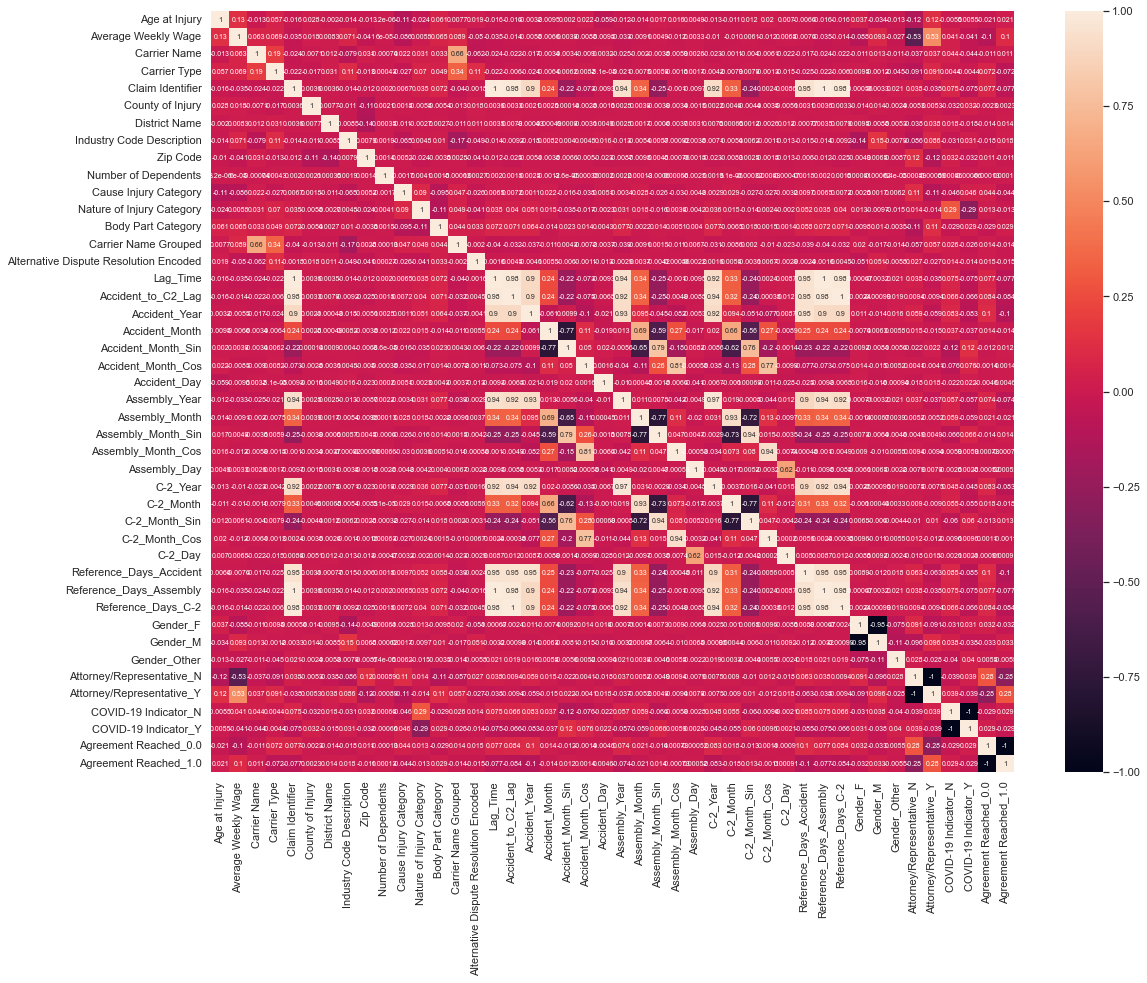

In [205]:
# plot the correlation
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(cor_spearman, xticklabels=cor_spearman.columns, yticklabels=cor_spearman.columns, annot=True, annot_kws={'fontsize': 7}, ax=ax)

__Correlation Insights__
- The one-hot encoded variables which are binary are perfectly negative correlation. So one of them should be discarded. 
- The date variables (extracted date features) are highly correlated. Especially the Accident / Assemby and C-2 Month and Month Sine variables, which makes sense since they hold the same information. Also, the month variables of the different events are highly correlated, which will be due to them happening within a short period of time, meaning the same month.
- The reference days of the different events are highly correlated. If the accident happens later (to the reference day), the other dates will as well.
- Claim Identifier is perfectly correlated with Lag_Time, indicating that it captures the date information within it. Further, it is  correlated with some of the date variables.
- Average Weekly Wage is correlated to Attorney/Representive


### 4.2 RFE <a id='rfe'></a>
[to the top](#top)

Since we already encoded all features and scaled them, we will do RFE for all features.

In [289]:
#no of features
nof_list=np.arange(5,20)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X = X_train_df_scaled, y = y_train_df_encode)
    X_val_rfe = rfe.transform(X_val_df_scaled)
    model.fit(X_train_rfe,y_train_df_encode)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_df_encode)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val_df_encode)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.757373


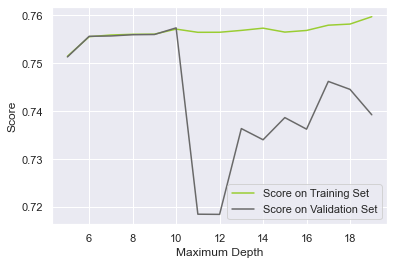

In [290]:
plt.plot(list(range(5,20)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(5,20)), val_score_list, label="Score on Validation Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [293]:
features_to_select = X_train_df_scaled.columns[rfe.support_]
features_to_select

Index(['Age at Injury', 'Average Weekly Wage', 'Claim Identifier',
       'Medical Fee Region', 'Agreement Reached', 'Age_Group', 'Wage_Group',
       'Body Part Category', 'Alternative Dispute Resolution Encoded',
       'Lag_Time', 'Accident_to_C2_Lag', 'Reference_Days_Accident',
       'Reference_Days_C-2', 'Gender_F', 'Gender_M',
       'Attorney/Representative_N', 'Attorney/Representative_Y',
       'COVID-19 Indicator_N', 'COVID-19 Indicator_Y'],
      dtype='object')

In [292]:
features_to_select = pd.Series(rfe.support_, index = X_train_df_scaled.columns)
features_to_select

Age at Injury                              True
Average Weekly Wage                        True
Carrier Name                              False
Carrier Type                              False
Claim Identifier                           True
County of Injury                          False
District Name                             False
Industry Code Description                 False
Medical Fee Region                         True
Zip Code                                  False
Agreement Reached                          True
Number of Dependents                      False
Age_Group                                  True
Wage_Group                                 True
Cause Injury Category                     False
Nature of Injury Category                 False
Body Part Category                         True
Carrier Name Grouped                      False
Alternative Dispute Resolution Encoded     True
Lag_Time                                   True
Accident_to_C2_Lag                      

In [294]:
rfe.ranking_

array([ 1,  1,  8, 20,  1, 25, 17,  4,  1,  3,  1, 28,  1,  1,  6,  2,  1,
       19,  1,  1,  1,  7, 22, 27, 12, 18,  9, 23, 11, 13, 26,  5, 14, 10,
       15, 24,  1, 16,  1,  1,  1, 21,  1,  1,  1,  1])

### 4.3 RFECV <a id='rfecv'></a>
[to the top](#top)

In [ ]:
# Use only a subset because of the long running time

In [149]:
# Initialize the model
model = LogisticRegression()

# Set up RFECV with cross-validation on the training data
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV on the training data only
X_train_rfe = rfecv.fit_transform(X_train, y_train)

# Transform the validation set based on selected features from the training set
X_val_rfe = rfecv.transform(X_val)

# Evaluate the model on the validation set with selected features
val_score = rfecv.estimator_.score(X_val_rfe, y_val)

# Print the results
print("Optimum number of features: %d" % rfecv.n_features_)
print("Score with selected features on training set: %f" % max(rfecv.grid_scores_))
print("Score with selected features on validation set: %f" % val_score)

### 4.4 Lasso Regression <a id='lasso'></a>
[to the top](#top)

In [209]:
reg = LassoCV()

In [210]:
reg.fit(X_train_df_scaled, y_train_df_encode)

LassoCV()

In [211]:
coef = pd.Series(reg.coef_, index = X_train_df_scaled.columns)
coef.sort_values()

Attorney/Representative_N                -6.105394e-01
Agreement Reached_0.0                    -5.928512e-02
Claim Identifier                         -4.818193e-02
Alternative Dispute Resolution Encoded   -2.521490e-02
Carrier Type                             -8.981612e-03
Accident_Day                             -6.622537e-03
Cause Injury Category                    -1.886854e-03
COVID-19 Indicator_Y                     -6.733770e-17
Assembly_Year                            -0.000000e+00
Assembly_Month                           -0.000000e+00
Assembly_Month_Sin                        0.000000e+00
Assembly_Day                             -0.000000e+00
Accident_Month_Cos                       -0.000000e+00
C-2_Year                                  0.000000e+00
C-2_Month                                -0.000000e+00
C-2_Month_Sin                            -0.000000e+00
C-2_Month_Cos                            -0.000000e+00
Assembly_Month_Cos                       -0.000000e+00
Accident_M

In [212]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

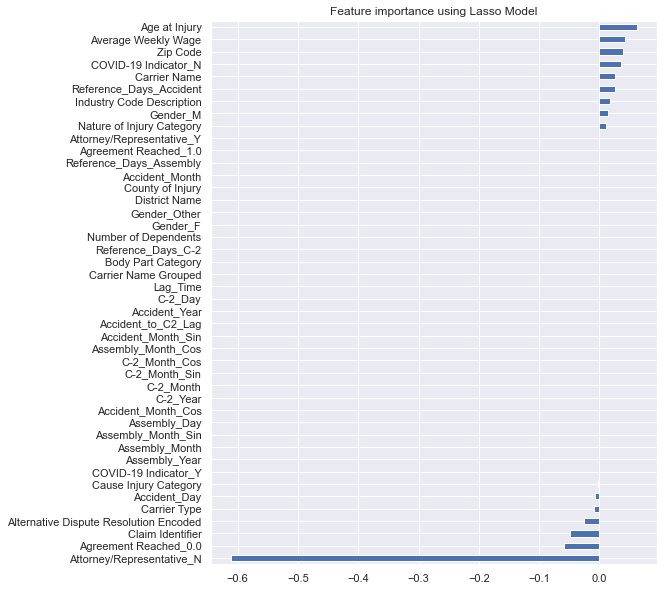

In [213]:
plot_importance(coef,'Lasso')

In [ ]:
# Features from Lasso Regression
# lasso_features = ["Age at Injury", "Accident_Day", "Attorney/Representative_N", "Average Weekly Wage", 
#                     "Claim Identifier", "Alternative Dispute Resolution Encoded", "Carrier Type""
#                     "Carrier Name", "COVID-19 Indicator_N", "Zip Code", "Reference_Days_Accident",
#                     "Industry Code Description", "Gender_M", "Nature of Injury Category" ]

### Summary

| Predictor                               | Spearman                                         | RFE LR     | Lasso   | Decision       |
|-----------------------------------------|--------------------------------------------------|------------|---------|----------------|
| Age at Injury                           | Keep                                            | Keep       | Keep    | Keep           |
| Average Weekly Wage                     | Keep                                            | Keep       | Keep    | Keep           |
| Carrier Name                            | Keep                                            | Discard    | Keep    | Keep           |
| Carrier Type                            | Discard   | Discard                             | Keep    | Discard        |
| Claim Identifier                        | Discard (or `Lag_Time`)                         | Keep       | Keep    | Keep           |
| County of Injury                        | Keep                                            | Discard    | Discard | Discard        |
| District Name                           | Keep                                            | Discard    | Discard | Discard        |
| Industry Code Description               | Keep                                            | Discard    | Keep    | Keep           |
| Medical Fee Region                      | Keep                                            | Keep       | Discard | Keep           |
| Zip Code                                | Keep                                            | Discard    | Keep    | Keep           |
| Number of Dependents                    | Keep                                            | Discard    | Discard | Discard        |
| Age_Group                               | Discard (or `Age at Injury`)        | Keep       | Discard | Discard           |
| Wage_Group                              | Discard (or `Average Weekly Wage`)              | Keep | Discard | Discard   |
| Cause Injury Category                   | Keep                                            | Discard    | Discard | Discard        |
| Nature of Injury Category               | Keep                                            | Discard    | Keep    | Keep           |
| Body Part Category                      | Keep                                            | Keep       | Discard | Keep           |
| Carrier Name Grouped                    | Discard (or `Carrier Name`)       | Discard    | Discard | Discard        |
| Alternative Dispute Resolution Encoded  | Keep                                            | Keep       | Keep    | Keep           |
| Lag_Time                                | Discard (or `Claim Identifier`)                                           | Keep       | Discard | Discard           |
| Accident_to_C2_Lag                      | Discard (or `Lag_Time`)          | Keep       | Discard | Discard        |
| Accident_Year                           | Discard (highly correlated with `Reference Days`) | Discard   | Discard | Discard        |
| Accident_Month                          | Discard (correlated with `Accident_Month_Sin`) | Discard | Discard | Discard        |
| Accident_Month_Sin                      | Keep (only one sine/cos pair for each event)     | Discard    | Discard | Discard        |
| Accident_Month_Cos                      | Discard (if `Accident_Month_Sin` is kept)        | Discard    | Discard | Discard        |
| Accident_Day                            | Keep                                            | Discard    | Keep    | Keep           |
| Assembly_Year                           | Discard (highly correlated with `Reference Days`) | Discard   | Discard | Discard        |
| Assembly_Month                          | Discard (correlated with `Assembly_Month_Sin`) | Discard | Discard | Discard        |
| Assembly_Month_Sin                      | Keep (only one sine/cos pair for each event)     | Discard    | Discard | Discard        |
| Assembly_Month_Cos                      | Discard (if `Assembly_Month_Sin` is kept)        | Discard    | Discard | Discard        |
| Assembly_Day                            | Keep                                            | Discard    | Discard | Discard        |
| C-2_Year                                | Discard (highly correlated with `Reference Days`) | Discard   | Discard | Discard        |
| C-2_Month                               | Discard (correlated with `C-2_Month_Sin/Cos`)    | Discard    | Discard | Discard        |
| C-2_Month_Sin                           | Keep (only one sine/cos pair for each event)     | Discard    | Discard | Discard        |
| C-2_Month_Cos                           | Discard (if `C-2_Month_Sin` is kept)             | Discard    | Discard | Discard        |
| C-2_Day                                 | Keep                                            | Discard    | Discard | Discard        |
| Reference_Days_Accident                 | Keep                                            | Keep       | Keep    | Keep           |
| Reference_Days_Assembly                 | Discard  | Discard    | Discard | Discard        |
| Reference_Days_C-2                      | Discard (if other reference variable is kept)                                          | Keep       | Discard | Discard      |
| Gender_F                                | Discard (one of the binary gender indicators)    | Keep       | Discard | Discard        |
| Gender_M                                | Keep                                            | Keep       | Keep    | Keep           |
| Gender_Other                            | Discard (one of the binary gender indicators)    | Discard    | Discard | Discard        |
| Attorney/Representative_N               | Keep                                            | Keep       | Keep    | Keep           |
| Attorney/Representative_Y               | Discard (binary opposite of `Attorney/Representative_N`) | Keep | Discard | Discard |
| COVID-19 Indicator_N                    | Keep                                            | Keep       | Keep    | Keep           |
| COVID-19 Indicator_Y                    | Discard (binary opposite of `COVID-19 Indicator_N `)     | Keep    | Discard | Discard   |
| Agreement Reached_1.0                   | Not in testset     | Not in testset    | Not in testset | Not in testset        |


## 5. Modeling and Evaluation <a id='modeling'></a>
[to the top](#top)

### 5.1 Baseline <a id='baseline'></a>
[to the top](#top)

As a baseline, we will just predict the majority class.

In [214]:
# Predict the majority class for all instances as baseline
majority_class = mode(y_train_df_encode)[0][0]  

y_pred_baseline = [majority_class] * len(y_train_df_encode)

baseline_accuracy = accuracy_score(y_train_df_encode, y_pred_baseline)
print(f"Baseline Model Accuracy (predicting majority class): {baseline_accuracy:.2f}")

y_pred_baseline_original = target_encoder.inverse_transform(y_pred_baseline)

# Display classification report with the original labels
print("\nClassification Report for Baseline Model (Original Labels):")
print(classification_report(y_train, y_pred_baseline_original))

Baseline Model Accuracy (predicting majority class): 0.51

Classification Report for Baseline Model (Original Labels):
                 precision    recall  f1-score   support

   1. CANCELLED       0.00      0.00      0.00      9981
    2. NON-COMP       0.51      1.00      0.67    232862
    3. MED ONLY       0.00      0.00      0.00     55125
   4. TEMPORARY       0.00      0.00      0.00    118805
5. PPD SCH LOSS       0.00      0.00      0.00     38624
     6. PPD NSL       0.00      0.00      0.00      3369
         7. PTD       0.00      0.00      0.00        78
       8. DEATH       0.00      0.00      0.00       376

       accuracy                           0.51    459220
      macro avg       0.06      0.12      0.08    459220
   weighted avg       0.26      0.51      0.34    459220



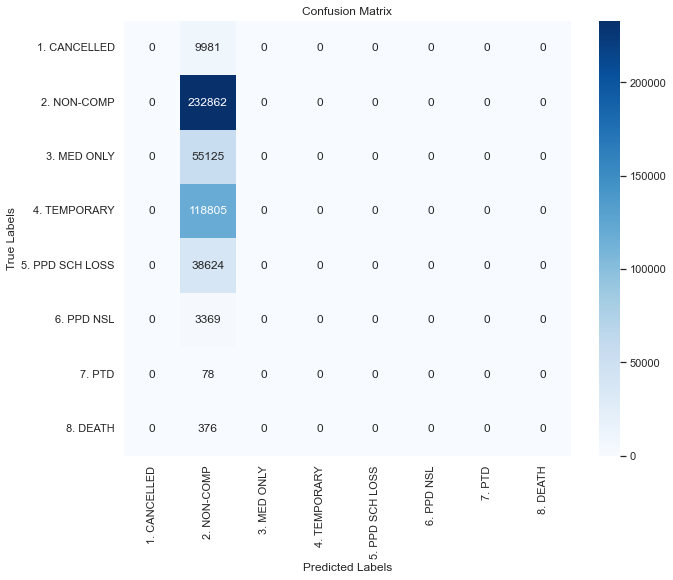

In [215]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_baseline_original, labels=target_encoder.classes_)

# Create a DataFrame for the confusion matrix for better labeling in heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_encoder.classes_, columns=target_encoder.classes_)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 5.2 Logistic Regression <a id='logistic_regression'></a>
[to the top](#top)

__Test Dataset Transformations__

In [222]:
# Perform all transformations, mapping, encodings and scaling for test
# Map columns to new categories

X_test_bin['Body Part Category'] = X_test_bin['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')
X_test_bin['Nature of Injury Category'] = X_test_bin['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')
X_test_bin['Cause Injury Category'] = X_test_bin['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

# Group 'Carrier Name' based on frequency threshold
X_test_bin['Carrier Name Grouped'] = X_test_bin['Carrier Name'].apply(
    lambda x: x if x in frequent_carriers else 'Other'
)

# Encode the 'Alternative Dispute Resolution' column as in training data
X_test_bin['Alternative Dispute Resolution Encoded'] = X_test_bin['Alternative Dispute Resolution'].map({'N': 0, 'Y': 1, 'U': 2})

# Convert date columns to datetime and handle errors
test_df_date2 = X_test_bin.copy()
test_df_date2['Accident Date'] = pd.to_datetime(test_df_date2['Accident Date'], errors='coerce')
test_df_date2['Assembly Date'] = pd.to_datetime(test_df_date2['Assembly Date'], errors='coerce')
test_df_date2['C-2 Date'] = pd.to_datetime(test_df_date2['C-2 Date'], errors='coerce')

# Calculate the lag times as numeric differences
test_df_date2['Lag_Time'] = (test_df_date2['Assembly Date'] - test_df_date2['Accident Date'].min()).dt.days
test_df_date2['Accident_to_C2_Lag'] = (test_df_date2['C-2 Date'] - test_df_date2['Accident Date'].min()).dt.days

X_test_bin['Lag_Time'] = test_df_date2['Lag_Time']
X_test_bin['Accident_to_C2_Lag'] = test_df_date2['Accident_to_C2_Lag']

# Extract year, month, day of week, and add cyclical features for date columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date']
for col in date_columns:
    test_df_date2[f'{col}_Year'] = test_df_date2[col].dt.year
    test_df_date2[f'{col}_Month'] = test_df_date2[col].dt.month
    test_df_date2[f'{col}_Day'] = test_df_date2[col].dt.dayofweek

# Apply these new date features to X_test_bin
X_test_bin['Accident_Year'] = test_df_date2['Accident Date_Year']
X_test_bin['Accident_Month'] = test_df_date2['Accident Date_Month']
X_test_bin['Accident_Month_Sin'] = np.sin(2 * np.pi * X_test_bin['Accident_Month'] / 12)
X_test_bin['Accident_Month_Cos'] = np.cos(2 * np.pi * X_test_bin['Accident_Month'] / 12)
X_test_bin['Accident_Day'] = test_df_date2['Accident Date_Day']

X_test_bin['Assembly_Year'] = test_df_date2['Assembly Date_Year']
X_test_bin['Assembly_Month'] = test_df_date2['Assembly Date_Month']
X_test_bin['Assembly_Month_Sin'] = np.sin(2 * np.pi * X_test_bin['Assembly_Month'] / 12)
X_test_bin['Assembly_Month_Cos'] = np.cos(2 * np.pi * X_test_bin['Assembly_Month'] / 12)
X_test_bin['Assembly_Day'] = test_df_date2['Assembly Date_Day']

X_test_bin['C-2_Year'] = test_df_date2['C-2 Date_Year']
X_test_bin['C-2_Month'] = test_df_date2['C-2 Date_Month']
X_test_bin['C-2_Month_Sin'] = np.sin(2 * np.pi * X_test_bin['C-2_Month'] / 12)
X_test_bin['C-2_Month_Cos'] = np.cos(2 * np.pi * X_test_bin['C-2_Month'] / 12)
X_test_bin['C-2_Day'] = test_df_date2['C-2 Date_Day']

# Set datetime columns and reference days calculations
X_test_bin['Accident Date'] = pd.to_datetime(X_test_bin['Accident Date'], errors='coerce')
X_test_bin['Assembly Date'] = pd.to_datetime(X_test_bin['Assembly Date'], errors='coerce')
X_test_bin['C-2 Date'] = pd.to_datetime(X_test_bin['C-2 Date'], errors='coerce')

# Reference dates for calculating days since a specific date
reference_date_accident = pd.to_datetime('1961-09-06')
reference_date_assembly = pd.to_datetime('2020-01-01')
reference_date_c2 = pd.to_datetime('1996-01-12')

X_test_bin['Reference_Days_Accident'] = (X_test_bin['Accident Date'] - reference_date_accident).dt.days
X_test_bin['Reference_Days_Assembly'] = (X_test_bin['Assembly Date'] - reference_date_assembly).dt.days
X_test_bin['Reference_Days_C-2'] = (X_test_bin['C-2 Date'] - reference_date_c2).dt.days


In [267]:
X_test_df_encode = X_test_bin.copy()

# Apply One-Hot Encoding using the same columns as in the training set
X_test_df_encode = pd.get_dummies(X_test_df_encode, columns=one_hot_encode_columns, drop_first=False)

# Align the columns of the test set with the training set to handle any missing columns from one-hot encoding
X_test_df_encode = X_test_df_encode.reindex(columns=X_train_df_encode.columns, fill_value=0)

# Apply Label Encoding using the stored label encoders from the training set
for col in label_encode_columns:
    le = label_encoders[col]  # Retrieve the encoder from the training set
    # Ensure that any unseen categories are mapped to 'Unknown'
    X_test_df_encode[col] = X_test_df_encode[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    le.classes_ = np.append(le.classes_, 'Unknown')  # Add 'Unknown' to the encoder classes if not present
    X_test_df_encode[col] = le.transform(X_test_df_encode[col].astype(str))

# Fill missing values in ordinal columns if any, with the mode from the training set
X_test_df_encode[ordinal_encode_columns] = X_test_df_encode[ordinal_encode_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Apply Ordinal Encoding using the stored ordinal encoder from the training set
X_test_df_encode[ordinal_encode_columns] = ordinal_encoder.transform(X_test_df_encode[ordinal_encode_columns])

# Scale the test data using the same scaler fitted on the training set
X_test_df_scaled = pd.DataFrame(scaler.transform(X_test_df_encode[numerical_columns]), 
                                columns=numerical_columns, index=X_test_df_encode.index)

X_test_df_scaled

,Age at Injury,Average Weekly Wage,Carrier Name,Carrier Type,Claim Identifier,County of Injury,District Name,Industry Code Description,Medical Fee Region,Zip Code,Agreement Reached,Number of Dependents,Age_Group,Wage_Group,Cause Injury Category,Nature of Injury Category,Body Part Category,Carrier Name Grouped,Alternative Dispute Resolution Encoded,Lag_Time,Accident_to_C2_Lag,Accident_Year,Accident_Month,Accident_Month_Sin,Accident_Month_Cos,Accident_Day,Assembly_Year,Assembly_Month,Assembly_Month_Sin,Assembly_Month_Cos,Assembly_Day,C-2_Year,C-2_Month,C-2_Month_Sin,C-2_Month_Cos,C-2_Day,Reference_Days_Accident,Reference_Days_Assembly,Reference_Days_C-2,Gender_F,Gender_M,Gender_Other,Attorney/Representative_N,Attorney/Representative_Y,COVID-19 Indicator_N,COVID-19 Indicator_Y
0,-1.620239,-0.071231,-0.387479,-0.835860,1.739887,-1.715428,0.351201,1.298799,0.777671,-0.977108,-0.220754,-1.002316,-2.045881,-0.659595,-0.909405,0.595727,0.361819,-0.982238,-0.067503,-4.275600,-2.868436,0.634515,1.594804,0.005220,1.412912,1.353998,2.403390,-1.594229,0.718571,1.233410,-1.397018,1.590661,-1.591077,0.713820,1.235283,-1.451799,0.889692,1.686452,1.166935,-0.829764,0.843907,-0.090859,0.680716,-0.680716,0.224686,-0.224686
1,-1.620239,-0.071231,-1.830180,-0.835860,1.740921,0.578656,0.351201,1.113119,0.777671,-0.335187,-0.220754,-1.002316,-2.045881,-0.659595,1.228194,0.595727,1.073841,-2.969010,-0.067503,-4.275600,-2.868436,0.634515,1.306293,-0.696311,1.221895,1.900850,2.403390,-1.594229,0.718571,1.233410,-1.397018,1.590661,-1.591077,0.713820,1.235283,-1.451799,0.839856,1.686452,1.166935,1.205163,-1.184965,-0.090859,0.680716,-0.680716,0.224686,-0.224686
2,1.184250,-0.071231,-1.707043,-0.835860,1.739869,1.786068,0.351201,-1.672082,0.029959,-0.849050,-0.220754,-1.502161,0.895053,-0.659595,0.693794,0.595727,-1.596243,0.259494,-0.067503,-4.275600,-2.872733,0.634515,1.594804,0.005220,1.412912,-1.380265,2.403390,-1.594229,0.718571,1.233410,-1.397018,0.787007,1.604705,0.011501,1.426074,1.925395,0.892624,1.686452,1.162637,1.205163,-1.184965,-0.090859,0.680716,-0.680716,0.224686,-0.224686
3,0.903801,-0.071231,-0.389143,-0.835860,1.740498,0.578656,0.351201,1.298799,0.777671,-0.477927,-0.220754,1.496908,0.895053,-0.659595,0.693794,0.595727,0.183813,-1.230585,-0.067503,-4.275600,-2.868436,0.634515,1.594804,0.005220,1.412912,-0.286560,2.403390,-1.594229,0.718571,1.233410,-1.397018,1.590661,-1.591077,0.713820,1.235283,-1.451799,0.895555,1.686452,1.166935,1.205163,-1.184965,-0.090859,0.680716,-0.680716,0.224686,-0.224686
4,-1.199566,-0.071231,0.103406,-0.835860,1.740746,-0.447645,0.351201,-0.186641,0.777671,-0.617404,-0.220754,0.997063,-1.310647,-0.659595,-0.375005,0.595727,-0.706215,-0.485545,-0.067503,-4.275600,-2.872733,0.634515,1.594804,0.005220,1.412912,-0.833412,2.403390,-1.594229,0.718571,1.233410,-1.397018,0.787007,1.604705,0.011501,1.426074,1.925395,0.883829,1.686452,1.162637,-0.829764,0.843907,-0.090859,0.680716,-0.680716,0.224686,-0.224686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,0.693464,-0.071231,0.942070,0.066456,3.480994,-0.508015,1.948872,-0.558001,-1.465465,0.968231,-0.220754,0.997063,0.895053,-0.659595,-0.375005,-0.061856,0.539824,1.004533,-0.067503,-2.624766,-10.868268,-4.752403,0.729271,-1.397842,-0.012862,-0.286560,3.637253,-0.142008,0.016116,-1.423613,-0.005878,-7.249541,1.023654,-1.204953,0.714031,-0.776361,-4.614281,3.337286,-6.832897,-0.829764,0.843907,-0.090859,0.680716,-0.680716,0.224686,-0.224686
387971,1.184250,-0.071231,0.258159,0.968773,3.480913,1.242733,-0.181356,-0.558001,0.777671,-0.221811,-0.220754,-1.002316,0.895053,-0.659595,-0.375005,-0.061856,0.539824,0.011148,-0.067503,-2.624766,-1.630750,1.711899,-0.424772,0.706750,-1.247619,-0.286560,3.637253,-0.142008,0.016116,-1.423613,-0.005878,2.394316,0.152077,-0.690819,-1.231306,-0.100922,1.644565,3.337286,2.404620,1.205163,-1.18

In [299]:
# Define the selected features and label-encoded columns
selected_features = ["Age at Injury", "Attorney/Representative_N", "Average Weekly Wage", "Carrier Name",
                     "Claim Identifier", "Alternative Dispute Resolution Encoded", "Medical Fee Region",
                     "Nature of Injury Category", "Body Part Category", "Accident_Day", "Gender_M",
                     "COVID-19 Indicator_N", "Zip Code", "Reference_Days_Accident",
                     "Industry Code Description", "Gender_M", "Nature of Injury Category" ]

__Training__

In [302]:

# Filter out the selected features from the training dataset
X_train_selected = X_train_df_scaled[selected_features]

# Train a multinomial logistic regression model
print("Training multinomial logistic regression model...")
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model_lr.fit(X_train_selected, y_train_df_encode)
print("Model training completed.")

# Evaluate the model
y_train_pred = model_lr.predict(X_train_selected)
accuracy = accuracy_score(y_train_df_encode, y_train_pred)
print(f"Training Accuracy: {accuracy:.2f}")
print("Classification Report on Training Data:")
print(classification_report(y_train_df_encode, y_train_pred))

Training multinomial logistic regression model...
Model training completed.
Training Accuracy: 0.73
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.21      0.00      0.01      9981
           1       0.80      0.99      0.89    232862
           2       0.22      0.02      0.03     55125
           3       0.65      0.83      0.73    118805
           4       0.49      0.15      0.23     38624
           5       0.00      0.00      0.00      3369
           6       0.00      0.00      0.00        78
           7       0.33      0.00      0.01       376

    accuracy                           0.73    459220
   macro avg       0.34      0.25      0.24    459220
weighted avg       0.64      0.73      0.66    459220



In [268]:
# Define the parameter grid for 'C' in logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train_df_encode)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

/Users/lenahermann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lenahermann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best parameters: {'C': 100}
Best cross-validation score: 0.73


__Evaluation on Validation Dataset__

In [303]:
X_val_selected = X_val_df_scaled[selected_features]

y_val_pred_lr = best_model.predict(X_val_selected)

# Evaluate the model
val_accuracy = accuracy_score(y_val_df_encode, y_val_pred_lr)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Classification Report on Validation Data:")
print(classification_report(y_val_df_encode, y_val_pred_lr))

Validation Accuracy: 0.66
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2496
           1       0.85      0.94      0.89     58216
           2       0.24      0.00      0.01     13781
           3       0.74      0.43      0.54     29702
           4       0.26      0.89      0.41      9656
           5       0.00      0.00      0.00       842
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        94

    accuracy                           0.66    114806
   macro avg       0.26      0.28      0.23    114806
weighted avg       0.67      0.66      0.63    114806



__Combine Training and Validation to fit the Best Model__

By combining train and validation data, we can provide the model more data so that we have better predictions for the test dataset.

In [304]:
# Ensure X_train_selected and X_val_selected are DataFrames
if isinstance(X_train_selected, np.ndarray):
    X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
if isinstance(X_val_selected, np.ndarray):
    X_val_selected = pd.DataFrame(X_val_selected, columns=selected_features)

# Ensure y_train_df_encode and y_val_df_encode are Series
if isinstance(y_train_df_encode, np.ndarray):
    y_train_df_encode = pd.Series(y_train_df_encode)
if isinstance(y_val_df_encode, np.ndarray):
    y_val_df_encode = pd.Series(y_val_df_encode)
    
# Combine training and validation sets
X_combined = pd.concat([X_train_selected.reset_index(drop=True), X_val_selected.reset_index(drop=True)])
y_combined = pd.concat([y_train_df_encode.reset_index(drop=True), y_val_df_encode.reset_index(drop=True)])

# Initialize the best model from GridSearchCV or use the tuned parameters -> 'C': 100
final_model_lr = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, C=100 #grid_search.best_params_['C']
)

# Train the model on the combined dataset
final_model_lr.fit(X_combined, y_combined)


LogisticRegression(C=100, max_iter=1000, multi_class='multinomial',
                   random_state=42)

In [314]:
# Evaluate the model
y_comb_pred_lr = final_model_lr.predict(X_combined)
accuracy = accuracy_score(y_combined, y_comb_pred_lr)
print(f"Training Accuracy: {accuracy:.2f}")
print("Classification Report on Training Data:")
print(classification_report(y_combined, y_comb_pred_lr))

Training Accuracy: 0.73
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.26      0.00      0.01     12477
           1       0.80      1.00      0.89    291078
           2       0.22      0.02      0.03     68906
           3       0.65      0.83      0.73    148507
           4       0.51      0.14      0.22     48280
           5       0.00      0.00      0.00      4211
           6       0.00      0.00      0.00        97
           7       0.50      0.00      0.00       470

    accuracy                           0.73    574026
   macro avg       0.37      0.25      0.23    574026
weighted avg       0.65      0.73      0.66    574026



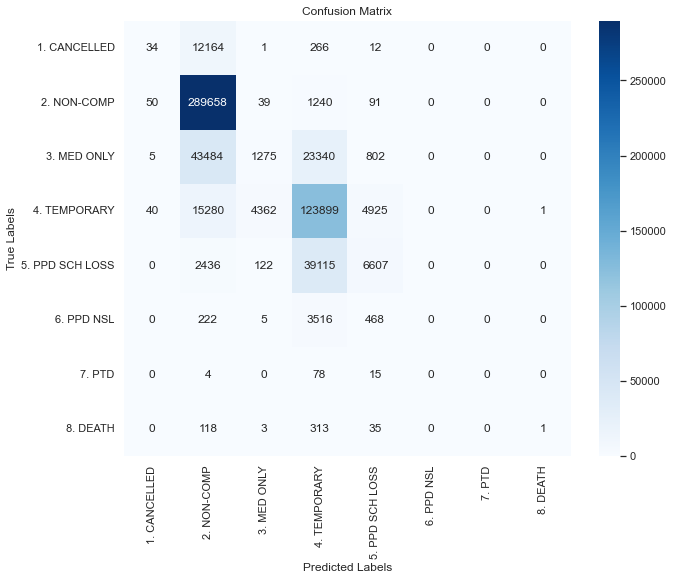

In [319]:
y_comb_pred_decoded_lr = target_encoder.inverse_transform(y_comb_pred_lr)
y_combined_decoded = target_encoder.inverse_transform(y_combined)

conf_matrix = confusion_matrix(y_combined_decoded, y_comb_pred_decoded_lr, labels=target_encoder.classes_)

# Create a DataFrame for the confusion matrix for better labeling in heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_encoder.classes_, columns=target_encoder.classes_)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

__Findings:__
- __Dominant Predictions in Major Classes:__ The model tends to classify most instances as "NON-COMP" or "TEMPORARY," which may be due to the model biasing towards these dominant classes in order to maximize accuracy. This bias indicates that the model may not be capturing the nuances necessary to distinguish minority classes effectively.
- __Poor Performance in Minority Classes:__ For classes like "CANCELLED," "PTD," and "DEATH," the model struggles to make correct predictions. For example, "CANCELLED" instances are often misclassified as "NON-COMP," and the model almost never predicts "DEATH" correctly. This is problematic, as correct classification in these classes could be crucial depending on the application.
- __Overlapping Classes:__ There are high off-diagonal values indicating confusion between classes like "MED ONLY" and "TEMPORARY," and between "PPD SCH LOSS" and "TEMPORARY." This suggests that the model finds these classes challenging to differentiate, potentially due to similar feature distributions or because these categories have overlapping characteristics.

__Prediction__

In [305]:
# Predict on the test set
y_test_pred_lr = final_model_lr.predict(X_test_df_scaled[selected_features])
y_test_decoded_lr = target_encoder.inverse_transform(y_test_pred_lr)
y_test_decoded_lr

array(['2. NON-COMP', '2. NON-COMP', '2. NON-COMP', ..., '2. NON-COMP',
       '2. NON-COMP', '2. NON-COMP'], dtype=object)

In [306]:
unique_values, counts = np.unique(y_test_decoded_lr, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

1. CANCELLED: 124
2. NON-COMP: 335033
3. MED ONLY: 4683
4. TEMPORARY: 48124
5. PPD SCH LOSS: 11


In [307]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'Claim Identifier': test_df['Claim Identifier'],  # Use 'Claim Identifier' as the ID
    'Prediction': y_test_decoded_lr
})

# Save the submission file
submission.to_csv('submission_lr.csv', index=False)
print("Submission file saved as 'submission_lr.csv'")

Submission file saved as 'submission_lr.csv'


In [308]:
submission

,Claim Identifier,Prediction
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,2. NON-COMP
387971,6553119,2. NON-COMP
387972,6553542,2. NON-COMP
387973,6553455,2. NON-COMP


### 5.3 Random Forest Classifier <a id='random_forest'></a>
[to the top](#top)

In [309]:
X_train_selected = X_train_df_scaled[selected_features]

# Train a random forest classifier
print("Training random forest classifier ...")
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
model_rf.fit(X_train_selected, y_train_df_encode)
print("Model training completed.")

# Evaluate the model
y_train_pred_rf = model_rf.predict(X_train_selected)
accuracy = accuracy_score(y_train_df_encode, y_train_pred_rf)
print(f"Training Accuracy: {accuracy:.2f}")
print("Classification Report on Training Data:")
print(classification_report(y_train_df_encode, y_train_pred_rf))

Training random forest classifier ...
Model training completed.
Training Accuracy: 0.76
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.70      0.09      0.17      9981
           1       0.81      0.99      0.89    232862
           2       0.71      0.01      0.01     55125
           3       0.69      0.89      0.77    118805
           4       0.76      0.32      0.46     38624
           5       0.00      0.00      0.00      3369
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00       376

    accuracy                           0.76    459220
   macro avg       0.46      0.29      0.29    459220
weighted avg       0.75      0.76      0.69    459220



In [310]:
X_val_selected = X_val_df_scaled[selected_features]

y_val_pred_rf = model_rf.predict(X_val_selected)

# Evaluate the model
val_accuracy = accuracy_score(y_val_df_encode, y_val_pred_rf)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Classification Report on Validation Data:")
print(classification_report(y_val_df_encode, y_val_pred_rf))

Validation Accuracy: 0.74
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2496
           1       0.80      1.00      0.89     58216
           2       0.00      0.00      0.00     13781
           3       0.66      0.83      0.73     29702
           4       0.43      0.23      0.30      9656
           5       0.00      0.00      0.00       842
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        94

    accuracy                           0.74    114806
   macro avg       0.24      0.26      0.24    114806
weighted avg       0.61      0.74      0.66    114806



In [312]:
# Train on combined data set
print("Training random forest classifier ...")
final_model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
final_model_rf.fit(X_combined, y_combined)
print("Model training completed.")

# Evaluate the model
y_comb_pred_rf = final_model_rf.predict(X_combined)
accuracy = accuracy_score(y_combined, y_comb_pred_rf)
print(f"Training Accuracy: {accuracy:.2f}")
print("Classification Report on Training Data:")
print(classification_report(y_combined, y_comb_pred_rf))


Training random forest classifier ...
Model training completed.
Training Accuracy: 0.76
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.69      0.08      0.14     12477
           1       0.80      0.99      0.89    291078
           2       0.73      0.00      0.01     68906
           3       0.68      0.88      0.77    148507
           4       0.72      0.31      0.44     48280
           5       0.00      0.00      0.00      4211
           6       0.00      0.00      0.00        97
           7       0.00      0.00      0.00       470

    accuracy                           0.76    574026
   macro avg       0.45      0.28      0.28    574026
weighted avg       0.75      0.76      0.69    574026



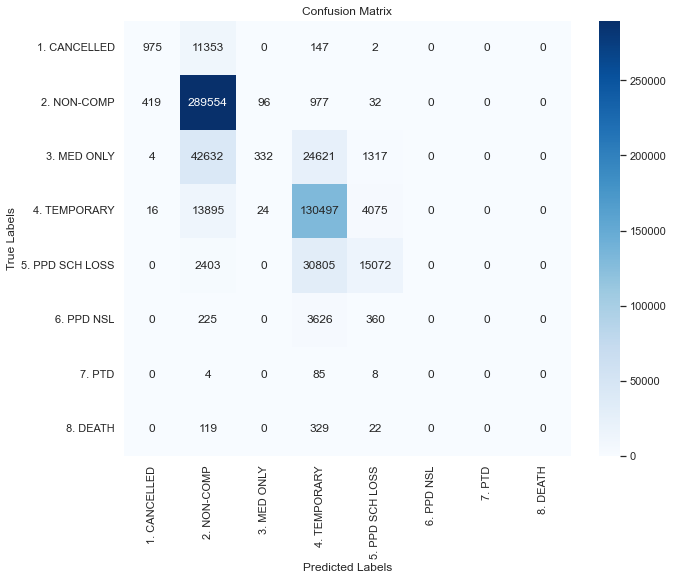

In [320]:
y_comb_pred_decoded_rf = target_encoder.inverse_transform(y_comb_pred_rf)

conf_matrix = confusion_matrix(y_combined_decoded, y_comb_pred_decoded_rf, labels=target_encoder.classes_)

# Create a DataFrame for the confusion matrix for better labeling in heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_encoder.classes_, columns=target_encoder.classes_)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

__Findings:__
- __Improvement in Certain Classes:__ The random forest classifier is showing better predictions for classes like "CANCELLED" and "TEMPORARY," as evidenced by more instances being correctly classified. For instance, 975 instances of "CANCELLED" and 130,497 instances of "TEMPORARY" are correctly predicted, which is an improvement over the logistic regression results.
- __Persistent Bias Toward Majority Classes:__ Similar to the logistic regression model, the random forest is heavily biased towards the majority class, "NON-COMP." It classifies a large number of instances into this category, which may indicate that the model still struggles with the imbalanced distribution of classes.
- __Challenges with Rare Classes:__ Similar to the logistic regression model, the random forest struggles with rare classes like "PPD NSL," "PTD," and "DEATH." These classes have very few correct predictions, indicating that the model has not learned to recognize their unique patterns well. This might be due to the insufficient representation of these classes in the training data

In [313]:
scores = cross_val_score(final_model_rf, X_combined, y_combined, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.76325279 0.76275424 0.76136928 0.76354688 0.73498541]
Average cross-validation score: 0.7571817198679647


In [315]:
y_test_pred_rf = final_model_rf.predict(X_test_df_scaled[selected_features])
y_test_decoded_rf = target_encoder.inverse_transform(y_test_pred_rf)
y_test_decoded_rf

array(['2. NON-COMP', '2. NON-COMP', '2. NON-COMP', ..., '2. NON-COMP',
       '2. NON-COMP', '1. CANCELLED'], dtype=object)

In [316]:
unique_values, counts = np.unique(y_test_decoded_rf, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

1. CANCELLED: 869
2. NON-COMP: 334397
3. MED ONLY: 28
4. TEMPORARY: 51976
5. PPD SCH LOSS: 705


In [317]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'Claim Identifier': test_df['Claim Identifier'],  # Use 'Claim Identifier' as the ID
    'Prediction': y_test_decoded_rf
})

# Save the submission file
submission.to_csv('submission_rf.csv', index=False)
print("Submission file saved as 'submission_rf.csv'")

Submission file saved as 'submission_rf.csv'


To do next time with more parameters (took to long to run):

In [322]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

In [323]:
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_combined, y_combined)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.6min
[CV] END max_depth=

In [324]:
# Using the best estimator directly
best_model_rf = grid_search.best_estimator_

# Train the model on the combined dataset
# Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best_model_rf.fit(X_combined, y_combined)

# Make predictions
y_train_pred_rf = best_model_rf.predict(X_combined)
y_test_pred_rf = best_model_rf.predict(X_test_df_scaled[selected_features])
y_test_decoded_rf = target_encoder.inverse_transform(y_test_pred_rf)
y_test_decoded_rf

array(['2. NON-COMP', '2. NON-COMP', '2. NON-COMP', ..., '1. CANCELLED',
       '1. CANCELLED', '1. CANCELLED'], dtype=object)

In [325]:
unique_values, counts = np.unique(y_test_decoded_rf, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

1. CANCELLED: 3786
2. NON-COMP: 320361
3. MED ONLY: 10623
4. TEMPORARY: 52378
5. PPD SCH LOSS: 827


In [326]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'Claim Identifier': test_df['Claim Identifier'],  # Use 'Claim Identifier' as the ID
    'Prediction': y_test_decoded_rf
})

# Save the submission file
submission.to_csv('submission_rf_new.csv', index=False)
print("Submission file saved as 'submission_rf_new.csv'")

Submission file saved as 'submission_rf_new.csv'
